# Dataset Variables

The dataset has 14 column names as below:

• age: the age of an individual 

• workclass: employment status of an individual 

• fnlwgt: final weight. In other words, this is the number of people the census believes the entry 
represents

• education: the highest level of education achieved by an individual

• education-num: the highest level of education achieved in numerical form

• marital-status: marital status of an individual. 

• occupation: the general type of occupation of an individual 

• relationship: represents what this individual is relative to others

• sex: the biological sex of the individual 

• capital-gain: capital gains for an individual 

• capital-loss: capital loss for an individual 

• hours-per-week: the hours an individual has reported to work per week 

• native-country: country of origin for an individual 

• label: whether or not an individual makes more than $50,000 annually.

# Import Libraries

In [1]:
#disabling warnings
import warnings
warnings.filterwarnings('ignore')

#import tools and libraries needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib inline  #this is used to display the plots in the notebook itself
%matplotlib inline


#import machine learning tools and libraries

#scikit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

#KMenas
from sklearn.cluster import KMeans

#ANN 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

#Hyperparameter tuning
from keras.layers import Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

#PCA
from sklearn.decomposition import PCA

#DBSCAN
from sklearn.cluster import DBSCAN








2023-08-04 12:20:15.379074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# (A) Load data

In [2]:
#load the dataset
census_df = pd.read_csv('CensusDB.csv')

# Data Exploration

In [3]:
#check the head of the dataset to see what we are working with
census_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [4]:
#Counts of the different income levels
census_df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [5]:
#Check for the shape of the dataset
census_df.shape

(32561, 14)

In [6]:
# Get the info of the dataset
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [7]:
# Display basic statistics for numeric columns, using the describe function with transpose. The transpose function
# is used to switch the rows and columns. It is then rounded to 2 decimal places. This makes it easier to read. 
census_df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.58,13.64,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.37,105549.98,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.08,2.57,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.65,7385.29,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.30,402.96,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.44,12.35,1.0,40.0,40.0,45.0,99.0


### Observation

1. **Dataset Structure:**
- The dataset contains 32,561 entries and 14 columns.
- There are no missing values, as all columns have 32,561 non-null entries.
- The dataset contains both numeric (int64) and categorical (object) variables.

2. **Data Preview:**
- The first few rows show that there are "?" values, which probably indicate missing data for some categorical variables (e.g., workclass and occupation)
- The target variable, income, has two classes: `"<=50K" and ">50K"`, indicating if an individual earns less or more than $50,000 annually.

3. **Numerical Data Description:**
- Age: Ranges from 17 to 90 with an average age of about 39 years

- Final Weight (fnlwgt): Has a wide range of values, with a mean of about 189,778

- Education-num: Ranges from 1 to 16, which likely represents the order of education levels.

- Capital-gain and Capital-loss: Most people have 0 for both these attributes, but there are some with high capital gains (max is 99,999) and capital losses (max is 4,356)

- Hours-per-week: On average, people work about 40.4 hours a week, with a range from 1 to 99 hours.


# Data Cleaning


During exploration analysis above, there some values that was observed that needed to be changed in the categorical variable. For example the `?` and the columns name with `- (dash)`.

In [8]:
#Check to identify columns with "?" values and handle them.
def get_question_marks(df):
    """
    This function takes in a dataframe and returns the number of question marks in each column.
    """
    for col in df.columns:
        if df[col].dtype == object:
            print(f"There are {df[df[col] == '?'].shape[0]} `?` values in {col} column")
get_question_marks(census_df)

There are 1836 `?` values in workclass column
There are 0 `?` values in education column
There are 0 `?` values in marital-status column
There are 1843 `?` values in occupation column
There are 0 `?` values in relationship column
There are 0 `?` values in sex column
There are 583 `?` values in native-country column
There are 0 `?` values in income column


#### Observation

According to the above analysis, there are hundreds and thousands of this value all over the dataset, which could cause issues in ML predictions.

In [9]:
# Replace '?' with NaN
census_df.replace('?', pd.NA, inplace=True)

# Check for missing values in each column
missing_data = census_df.isna().sum()

missing_data

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

The values confirm the analysis above, and also has helped to deal with this.

Given the nature of the dataset:

- For workclass and occupation, it might be appropriate to introduce a new category like 'Unknown' since these are categorical variables.
- For native-country, we can also consider imputing with the mode of the column.

Let's first visualize the distribution of these columns with missing values to decide on the imputation strategy.

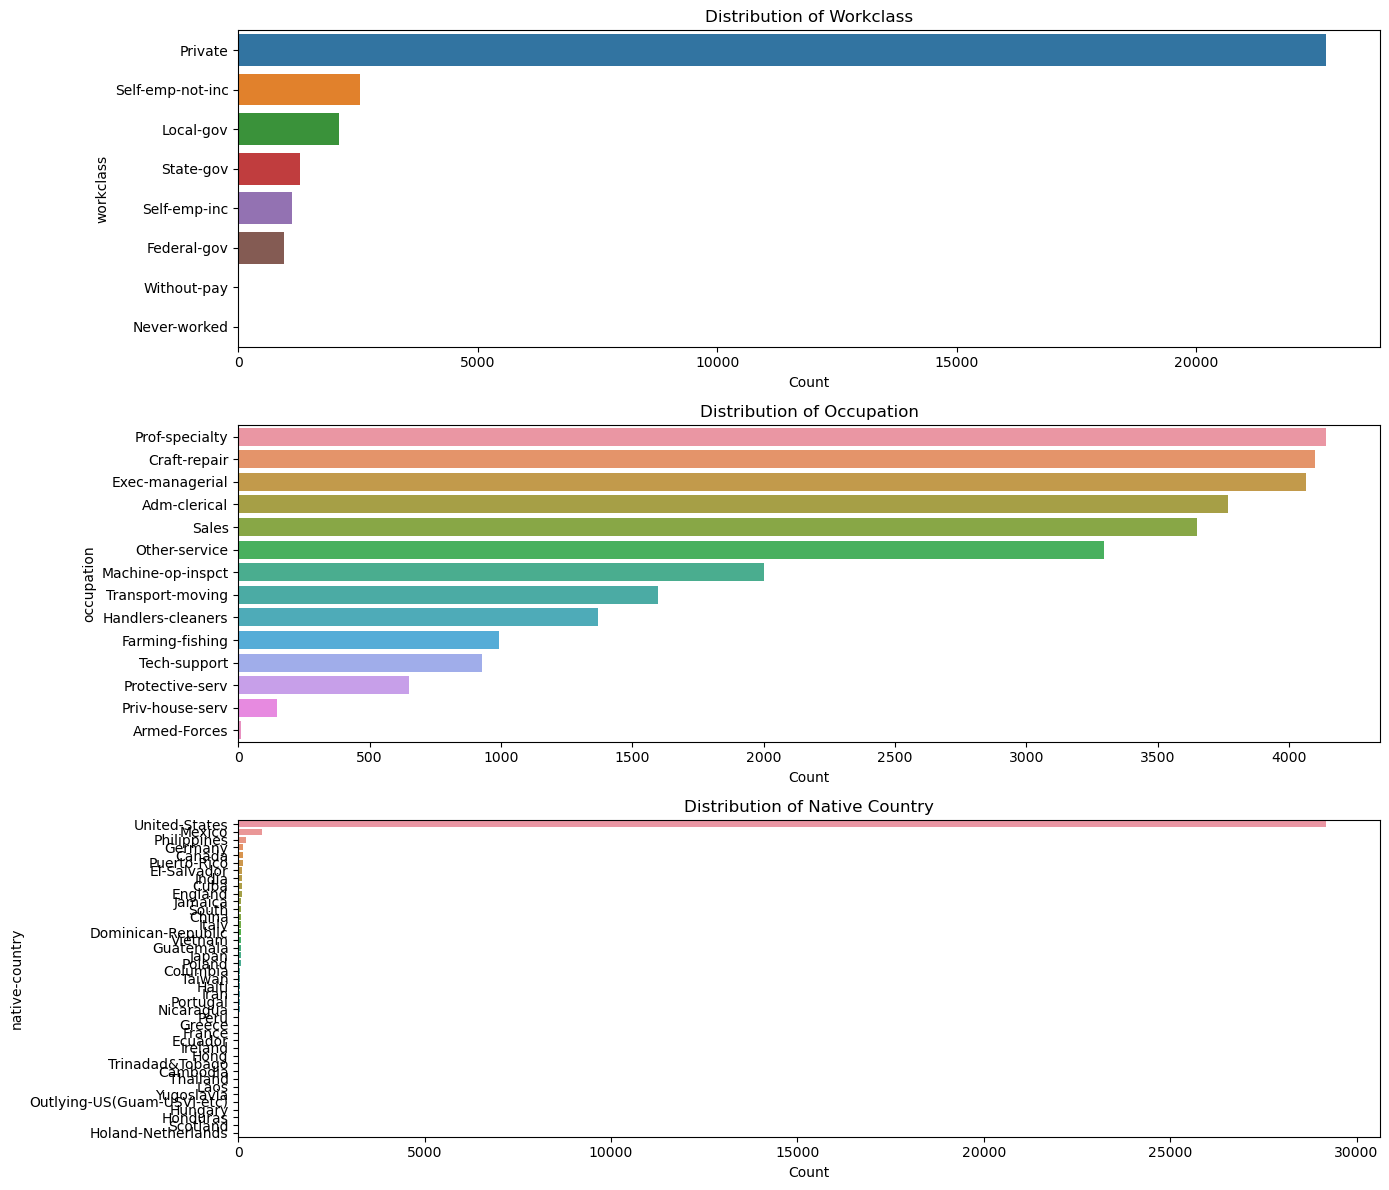

In [10]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(14, 12))

# Plot distribution of 'workclass'
sns.countplot(y=census_df['workclass'], ax=ax[0], order=census_df['workclass'].value_counts().index)
ax[0].set_title('Distribution of Workclass')
ax[0].set_xlabel('Count')

# Plot distribution of 'occupation'
sns.countplot(y=census_df['occupation'], ax=ax[1], order=census_df['occupation'].value_counts().index)
ax[1].set_title('Distribution of Occupation')
ax[1].set_xlabel('Count')

# Plot distribution of 'native-country'
sns.countplot(y=census_df['native-country'], ax=ax[2], order=census_df['native-country'].value_counts().index)
ax[2].set_title('Distribution of Native Country')
ax[2].set_xlabel('Count')

plt.tight_layout()
plt.show()


**Observations from the distributions:**

**Workclass:** Most individuals are in the "Private" workclass, followed by "Self-emp-not-inc" and "Local-gov".

**Occupation:** The occupation is spread across several categories.

**Native Country:** The vast majority of individuals are from "United-States". We can choose to impute the missing values with the mode ("United-States")


**Considering these observations, I'll proceed with the following imputation strategy:**

- For workclass and occupation, impute missing values with 'Unknown'.

- For native-country, impute missing values with 'United-States' (the mode, the most occuuring value in the column).


In [11]:
#Impute missing values
census_df['workclass'].fillna('Unknown', inplace=True)
census_df['occupation'].fillna('Unknown', inplace=True)
census_df['native-country'].fillna('United-States', inplace=True)

# Verify if there are any missing values left
remaining_missing = census_df.isna().sum()

remaining_missing

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

All missing values have been addressed and there are no more missing values in the dataset.

In [12]:
#A function that remove the dashes from the column names, and replace them with underscores. This helps to differentiate
# some of the column names that have dashes in them, also avoid errors when calling the columns.

def remove_dashes(df):
    """
    This function takes in a dataframe and replaces the dashes in the column names with underscores.
    """
    for col in df.columns:
        if '-' in col:
            df.rename(columns={col: col.replace('-', '_')}, inplace=True)

remove_dashes(census_df)

In [13]:
#check for changes in the columns names

census_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


Checking for unique values of the marital_status column

In [14]:
census_df['marital_status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [15]:
#check for duplicates
census_df.duplicated().sum()

24

In [16]:
#Since there is duplicate in the dataset, we can drop it to reduce error.
census_df.drop_duplicates(inplace=True)

Check for the duplicated values again just to be sure this has been deal with accordingly

In [17]:
census_df.duplicated().sum()

0

All duplicated value as been removed

In [18]:
census_df.shape

(32537, 14)

Check the shape of the dataset

# Exploratory Data Analysis

Data scientists utilise exploratory data analysis (EDA) to analyse and study data sets and summarise their primary properties, frequently using data visualisation approaches. It aids in determining how to modify data sources best to obtain the answers required, making it easier for data scientists to uncover patterns, detect anomalies, test hypotheses, and validate assumptions.
EDA is primarily used to discover what data can reveal beyond the formal modelling or hypothesis testing tasks, and it provides a deeper understanding of data set variables and their interactions. It can also assist you in assessing whether the statistical techniques you are considering using for data analysis are appropriate.`(IBM, assessed August 4,2023)`

#### We'll conduct the EDA in the following steps:

**Univariate Analysis:**
For numerical columns: Distribution plots.
For categorical columns: Count plots.

**Bivariate Analysis:**
For numerical columns: Box plots with the target variable (income).
For categorical columns: Count plots with the target variable (income).

**Multivariate Analysis:**
Correlation heatmap for numerical columns.
Pair plots or other visualizations to see relationships between multiple variables.

## Univariate Analysis

## For numerical columns

### Age

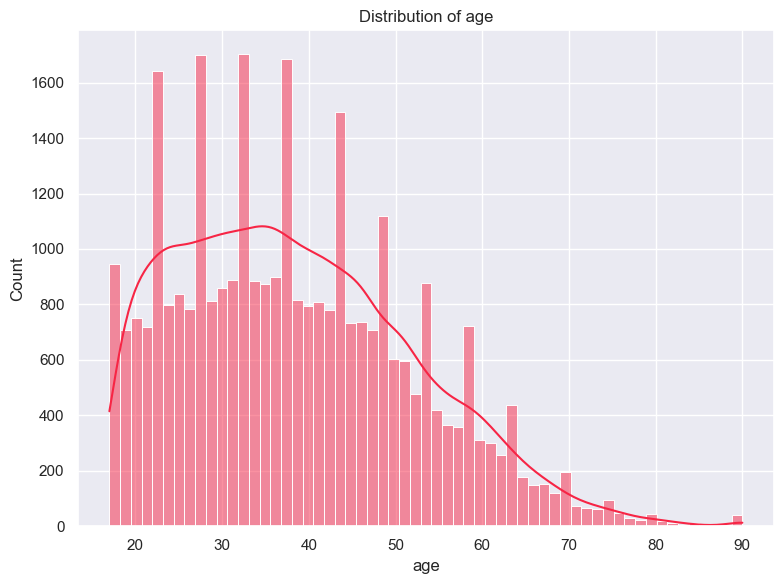

In [19]:
# Univariate Analysis

# Using seaborn's default styling
sns.set()

# Color palette to be used for the plots
palette = ["#F72545", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

# List of numerical columns to be plotted
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Plotting distribution for 'age'
plt.figure(figsize=(8, 6))
sns.histplot(census_df['age'], kde=True, color=palette[0])
plt.title(f'Distribution of age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Observation

**Age:** Most people are between the ages of 20-50, and there is a downward trend as individuals get older.

### fnlwgt

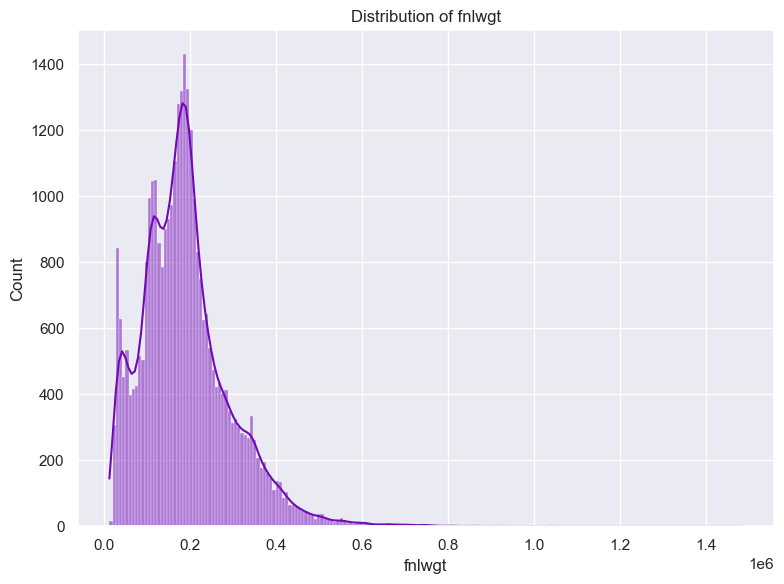

In [20]:
# Plotting distribution for 'fnlwgt'
plt.figure(figsize=(8, 6))
sns.histplot(census_df['fnlwgt'], kde=True, color=palette[1])
plt.title(f'Distribution of fnlwgt')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Observation**

**fnlwgt (Final Weight):** It's right-skewed with most values clustered on the lower side.

### Education number

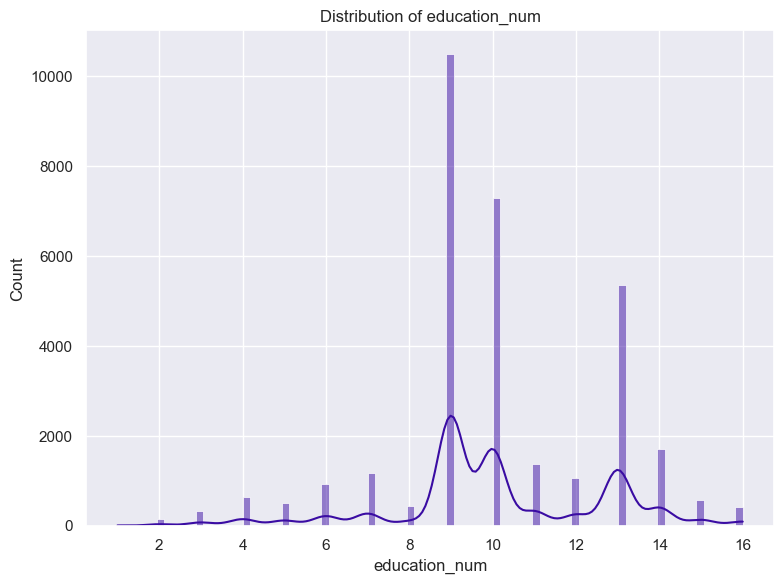

In [21]:
# Plotting distribution for 'education_num'
plt.figure(figsize=(8, 6))
sns.histplot(census_df['education_num'], kde=True, color=palette[2])
plt.title(f'Distribution of education_num')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Education-num:** Most individuals have around 9-10 years of education, which corresponds to high school or some college.

### Capital gain

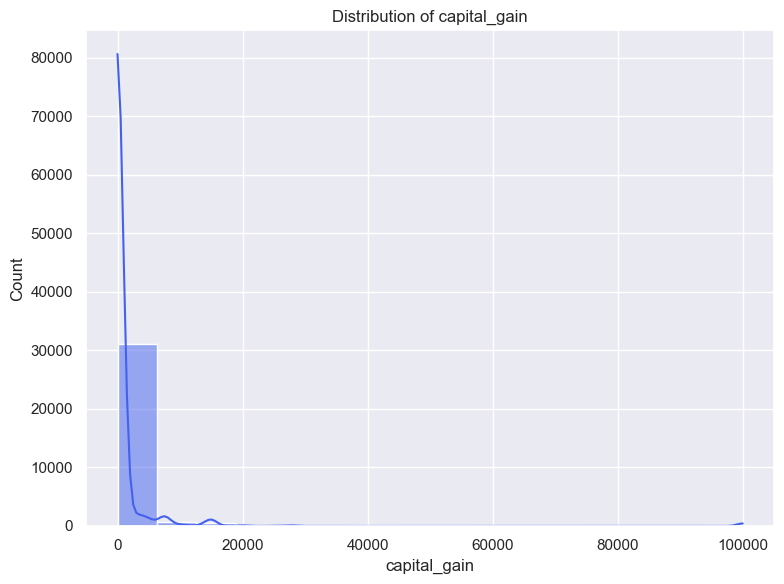

In [22]:
# Plotting distribution for 'capital_gain'
plt.figure(figsize=(8, 6))
sns.histplot(census_df['capital_gain'], kde=True, color=palette[3])
plt.title(f'Distribution of capital_gain')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Capital-gain & Capital-loss:** Most individuals have zero capital gains or losses, but there are some with high values.

### Capital loss

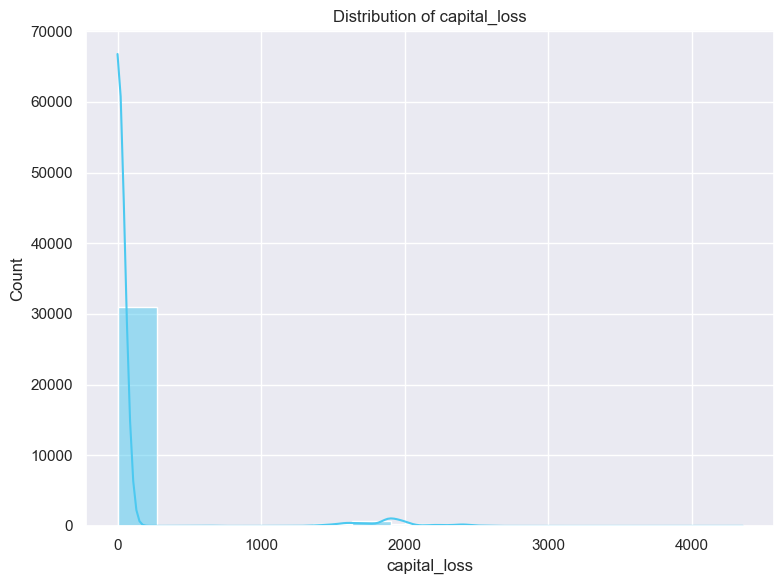

In [23]:
# Plotting distribution for 'capital_loss'
plt.figure(figsize=(8, 6))
sns.histplot(census_df['capital_loss'], kde=True, color=palette[4])
plt.title(f'Distribution of capital_loss')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Capital-gain & Capital-loss:** Most individuals have zero capital gains or losses, but there are some with high values.

### Hours per week

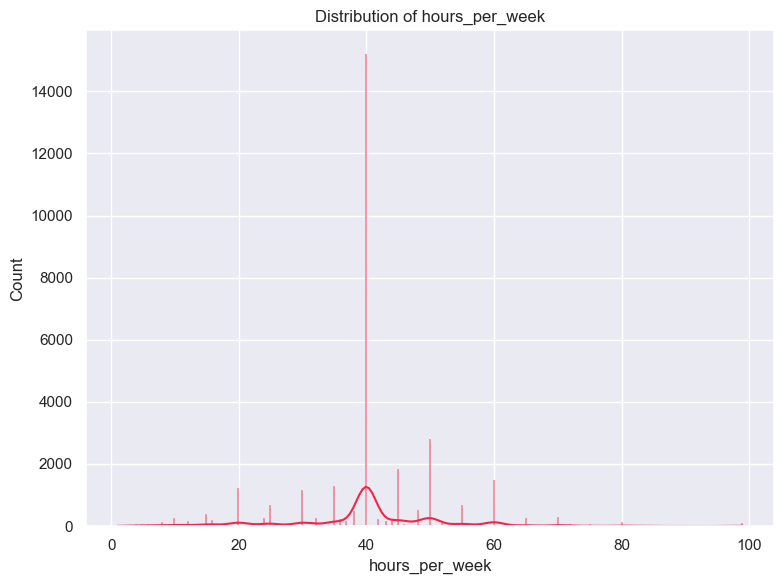

In [24]:
# Plotting distribution for 'hours_per_week'
plt.figure(figsize=(8, 6))
sns.histplot(census_df['hours_per_week'], kde=True, color=palette[5 % len(palette)])
plt.title(f'Distribution of hours_per_week')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Hours-per-week:** The most common working hours per week is around 40, which is the standard full-time work week in many countries.

## For categorical columns

### Workclass

In [25]:
census_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K


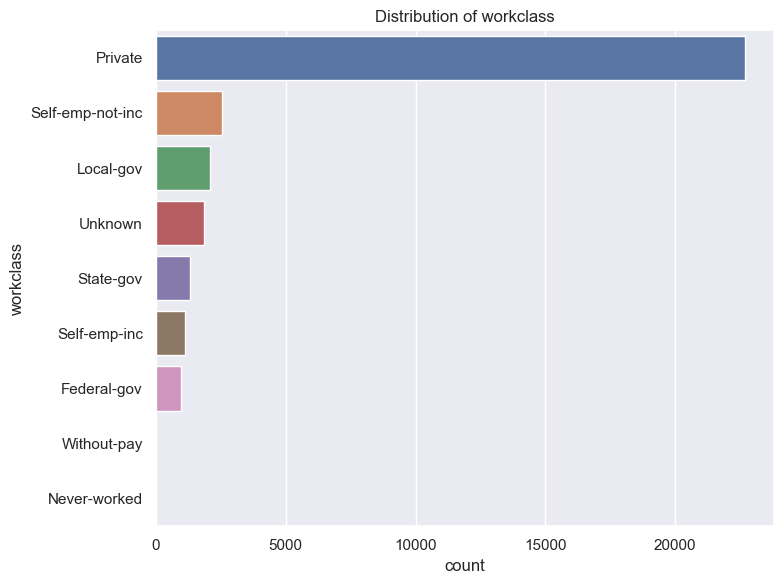

In [26]:
# Univariate Analysis

# Plotting counts for 'workclass'
plt.figure(figsize=(8, 6))
sns.countplot(y=census_df['workclass'], order=census_df['workclass'].value_counts().index)
plt.title(f'Distribution of workclass')
plt.tight_layout()
plt.show()



**Workclass:** A significant majority of individuals are in the private sector. There's also a notable number of people with an "Unknown" workclass, which indicates the missing values we replaced.

### Education

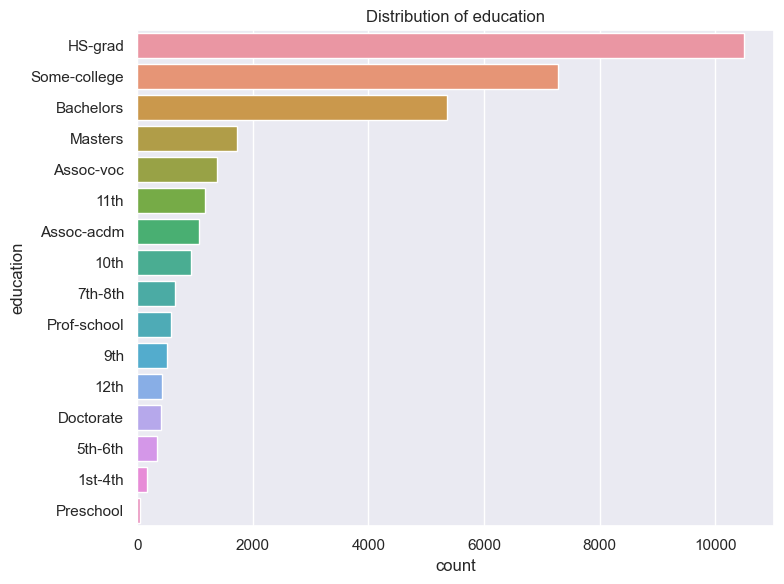

In [27]:
# Plotting counts for 'education'
plt.figure(figsize=(8, 6))
sns.countplot(y=census_df['education'], order=census_df['education'].value_counts().index)
plt.title(f'Distribution of education')
plt.tight_layout()
plt.show()

**Education:** "HS-grad" and "Some-college" are the most common education levels, then followed by "Bachelors and Masters".

### Marital status

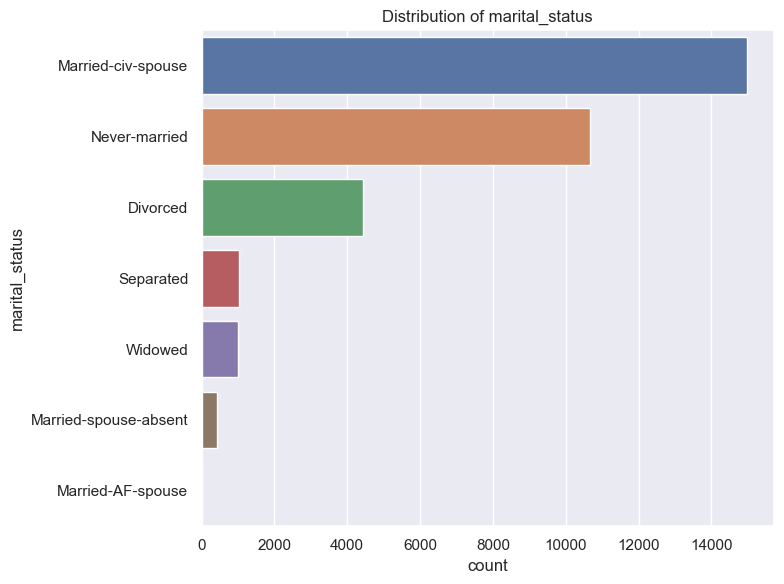

In [28]:
# Plotting counts for 'marital_status'
plt.figure(figsize=(8, 6))
sns.countplot(y=census_df['marital_status'], order=census_df['marital_status'].value_counts().index)
plt.title(f'Distribution of marital_status')
plt.tight_layout()
plt.show()

**Marital-status:** Most individuals are either "Married-civ-spouse" or "Never-married".

Please note that `Married-civ-spouse = Civilian spouse` while `Married-af-spouse = Armed Forces spouse`

### Occupation

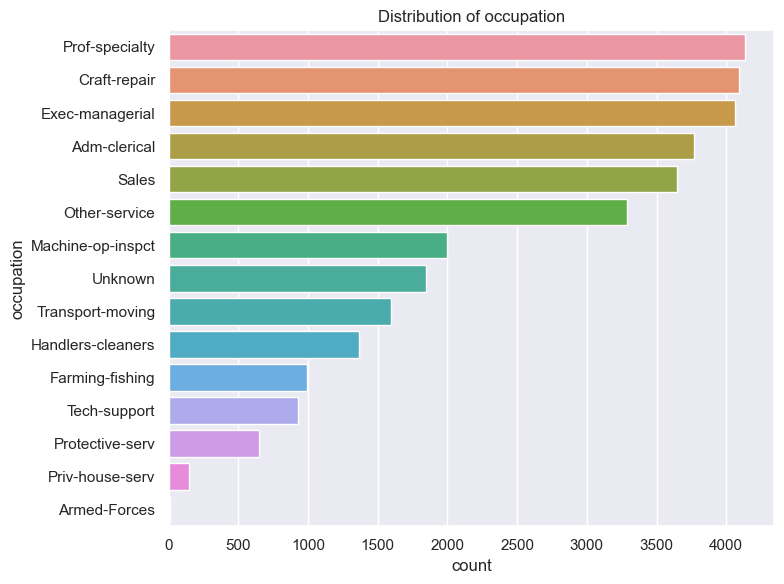

In [29]:
# Plotting counts for 'occupation'
plt.figure(figsize=(8, 6))
sns.countplot(y=census_df['occupation'], order=census_df['occupation'].value_counts().index)
plt.title(f'Distribution of occupation')
plt.tight_layout()
plt.show()


**Occupation:** The occupations are fairly distributed, with "Prof-specialty" and "Craft-repair" being more common. The "Unknown" category indicates the missing values we replaced.

### Relationship

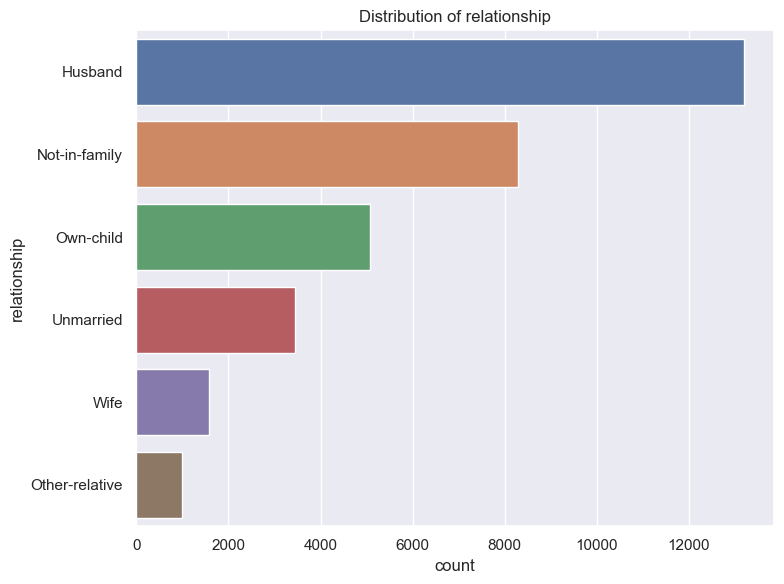

In [30]:
# Plotting counts for 'relationship'
plt.figure(figsize=(8, 6))
sns.countplot(y=census_df['relationship'], order=census_df['relationship'].value_counts().index)
plt.title(f'Distribution of relationship')
plt.tight_layout()
plt.show()

**Relationship:** A majority of the individuals are either "Husbands" or "Not-in-family".

### Sex

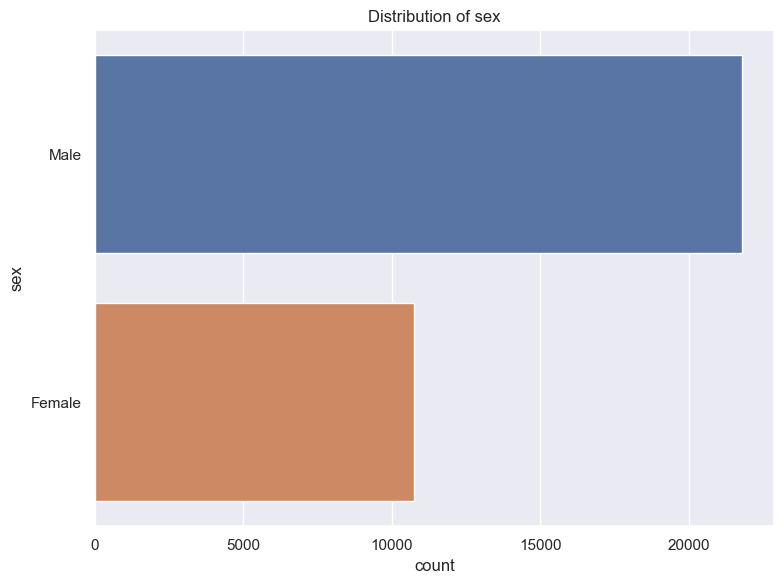

In [31]:
# Plotting counts for 'sex'
plt.figure(figsize=(8, 6))
sns.countplot(y=census_df['sex'], order=census_df['sex'].value_counts().index)
plt.title(f'Distribution of sex')
plt.tight_layout()
plt.show()

**Sex:** There are more males than females in the dataset.

### Native country

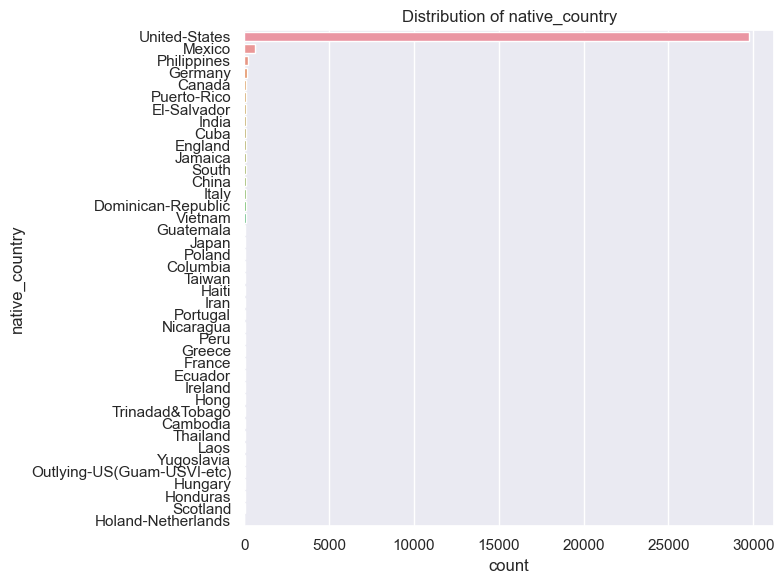

In [32]:
# Plotting counts for 'native_country'
plt.figure(figsize=(8, 6))
sns.countplot(y=census_df['native_country'], order=census_df['native_country'].value_counts().index)
plt.title(f'Distribution of native_country')
plt.tight_layout()
plt.show()


**Native-country:** An overwhelming majority are from the United States.

<function matplotlib.pyplot.show(close=None, block=None)>

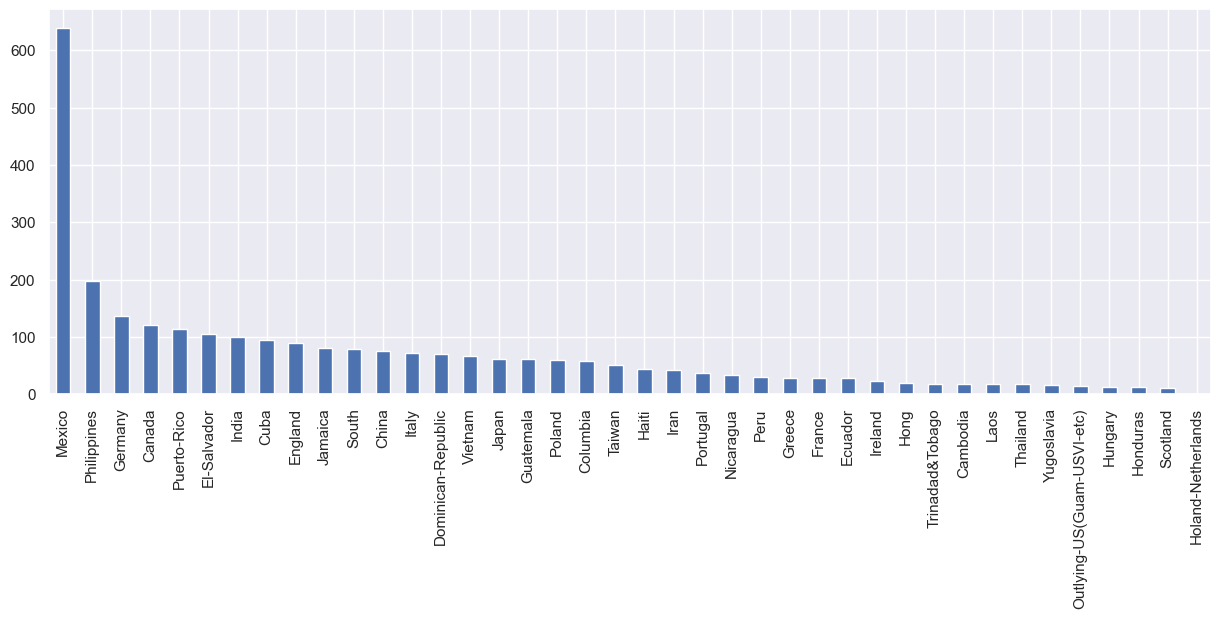

In [33]:
#Check native_country column, plot all country except United-States

census_df[census_df['native_country'] != 'United-States']['native_country'].value_counts().plot(kind='bar', figsize=(15,5))
plt.show

The above plot is all countries except for United-state. It measures numbers of individuals considered from the countries

## Bivariate Analysis

let's perform the Bivariate Analysis to understand the relationship between each feature and the target variable `income`.

## Numerical Variable

### Age vs Income

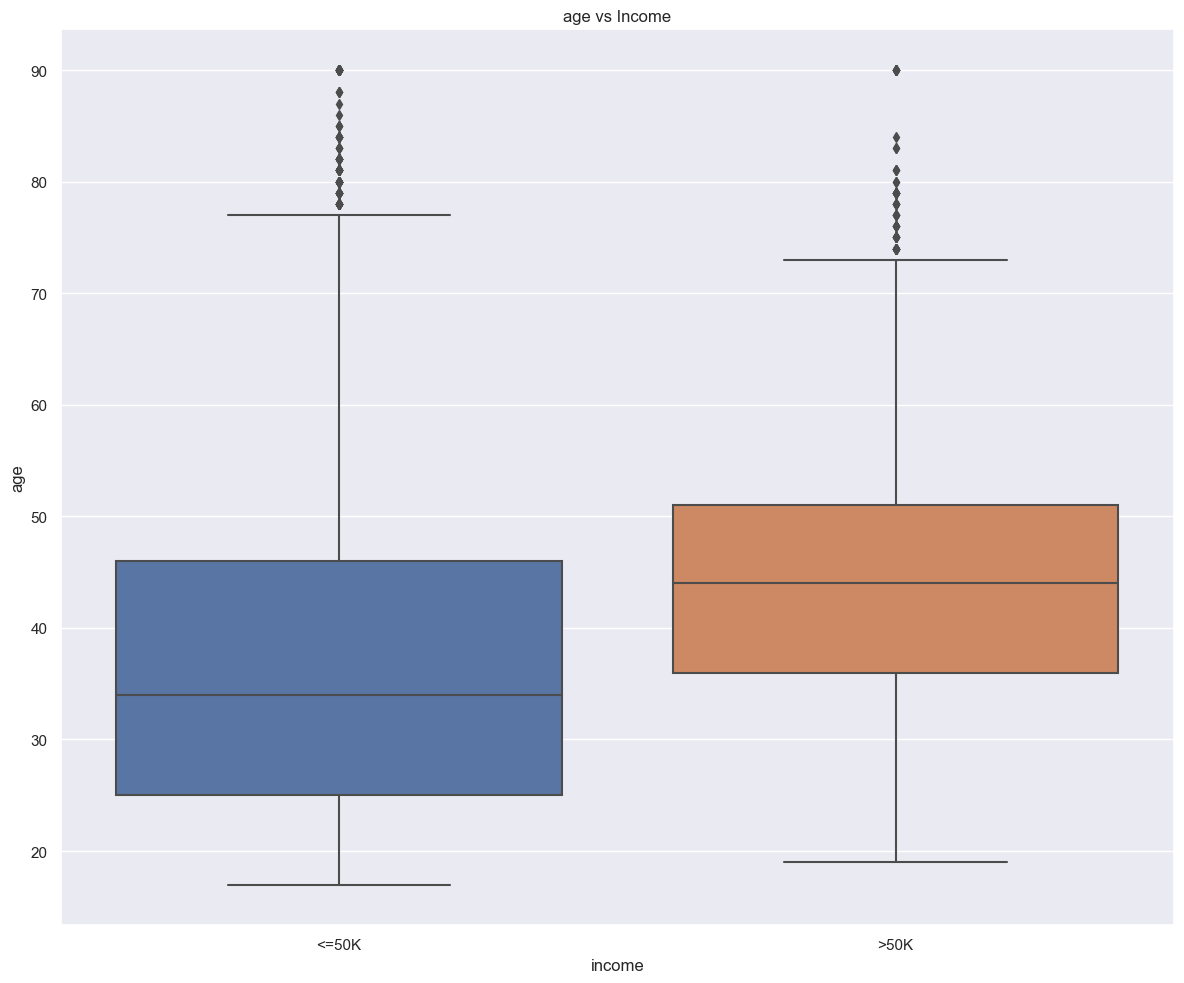

In [34]:
# Boxplot for the first numerical column vs income
plt.figure(figsize=(12, 10))
sns.boxplot(x='income', y=num_cols[0], data=census_df)
plt.title(f'{num_cols[0]} vs Income')
plt.tight_layout()
plt.show()

### Observations

Age: Older individuals seem to have a higher likelihood of earning above $50,000.

### fnlwgt vs Income

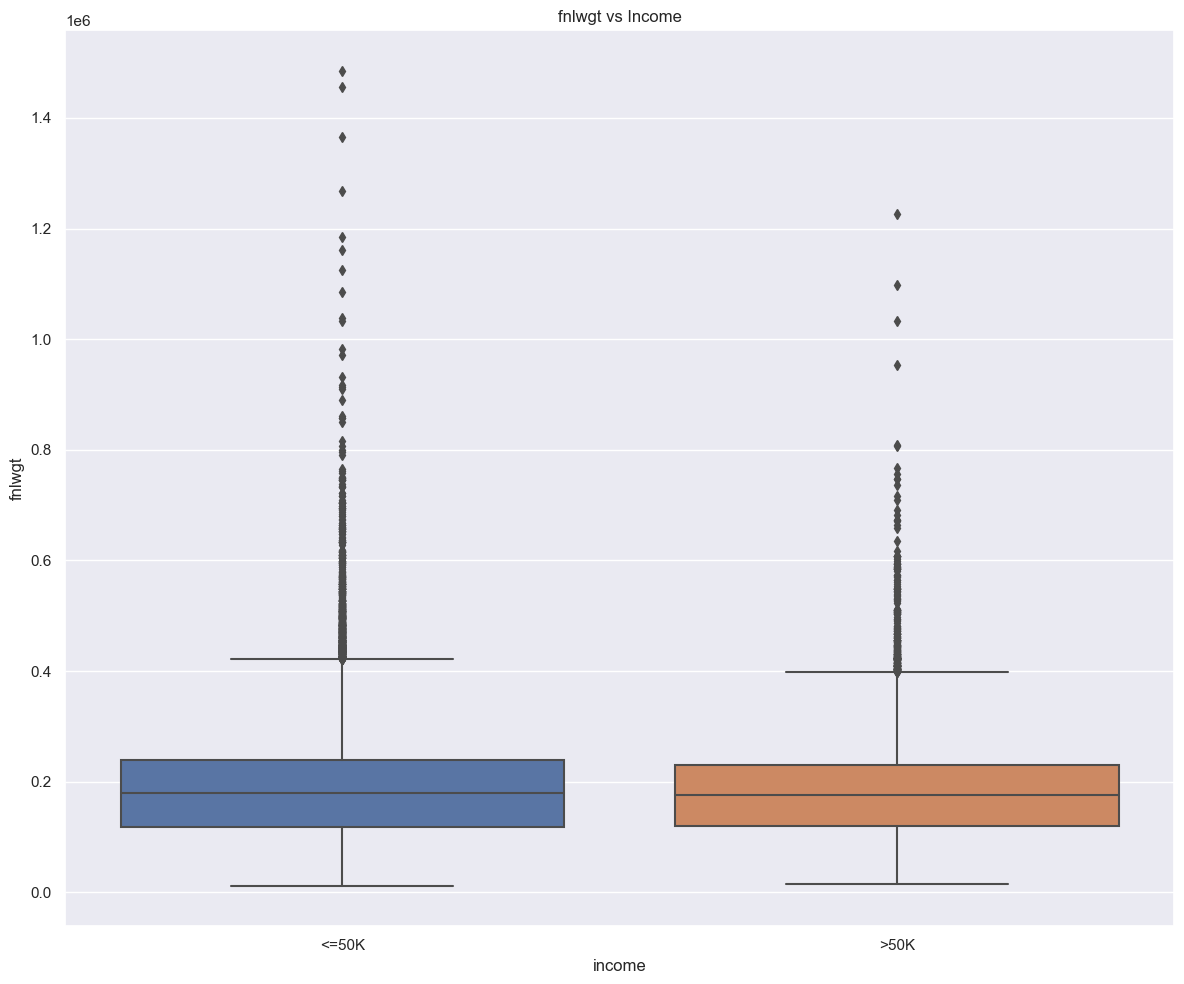

In [35]:
# Boxplot for the second numerical column vs income
plt.figure(figsize=(12, 10))
sns.boxplot(x='income', y=num_cols[1], data=census_df)
plt.title(f'{num_cols[1]} vs Income')
plt.tight_layout()
plt.show()

fnlwgt (Final Weight): There's no clear distinction between the two income groups based on this variable.

### Education_num vs Income

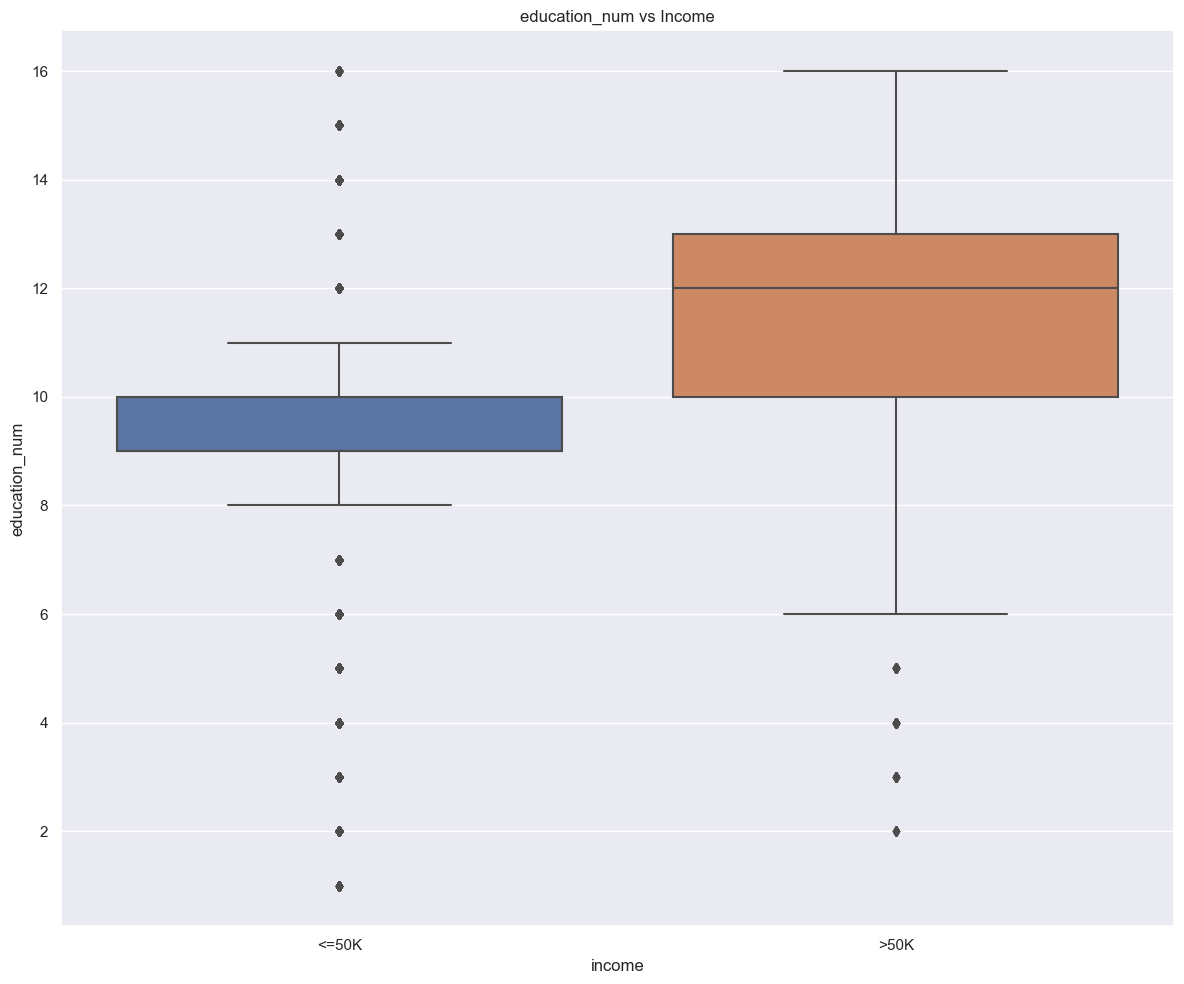

In [36]:
# Boxplot for the third numerical column vs income
plt.figure(figsize=(12, 10))
sns.boxplot(x='income', y=num_cols[2], data=census_df)
plt.title(f'{num_cols[2]} vs Income')
plt.tight_layout()
plt.show()

Education-num: Individuals with more years of education seem to have a higher probability of earning above $50,000.

### Capital_gain vs Income

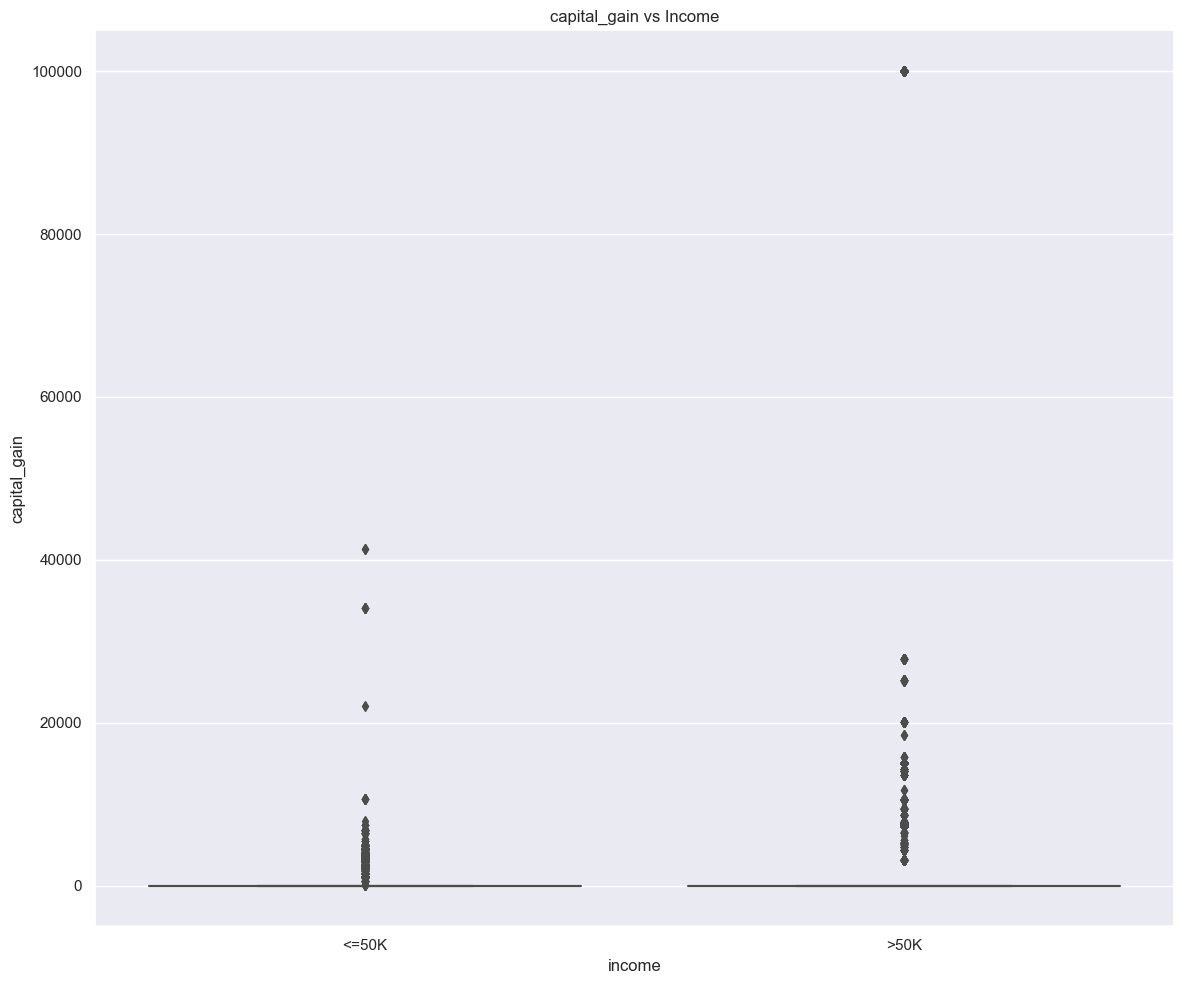

In [37]:
# Boxplot for the fourth numerical column vs income
plt.figure(figsize=(12, 10))
sns.boxplot(x='income', y=num_cols[3], data=census_df)
plt.title(f'{num_cols[3]} vs Income')
plt.tight_layout()
plt.show()

Capital-gain: Those with higher capital gains are more likely to earn above $50,000.

### Capital_loss vs Income

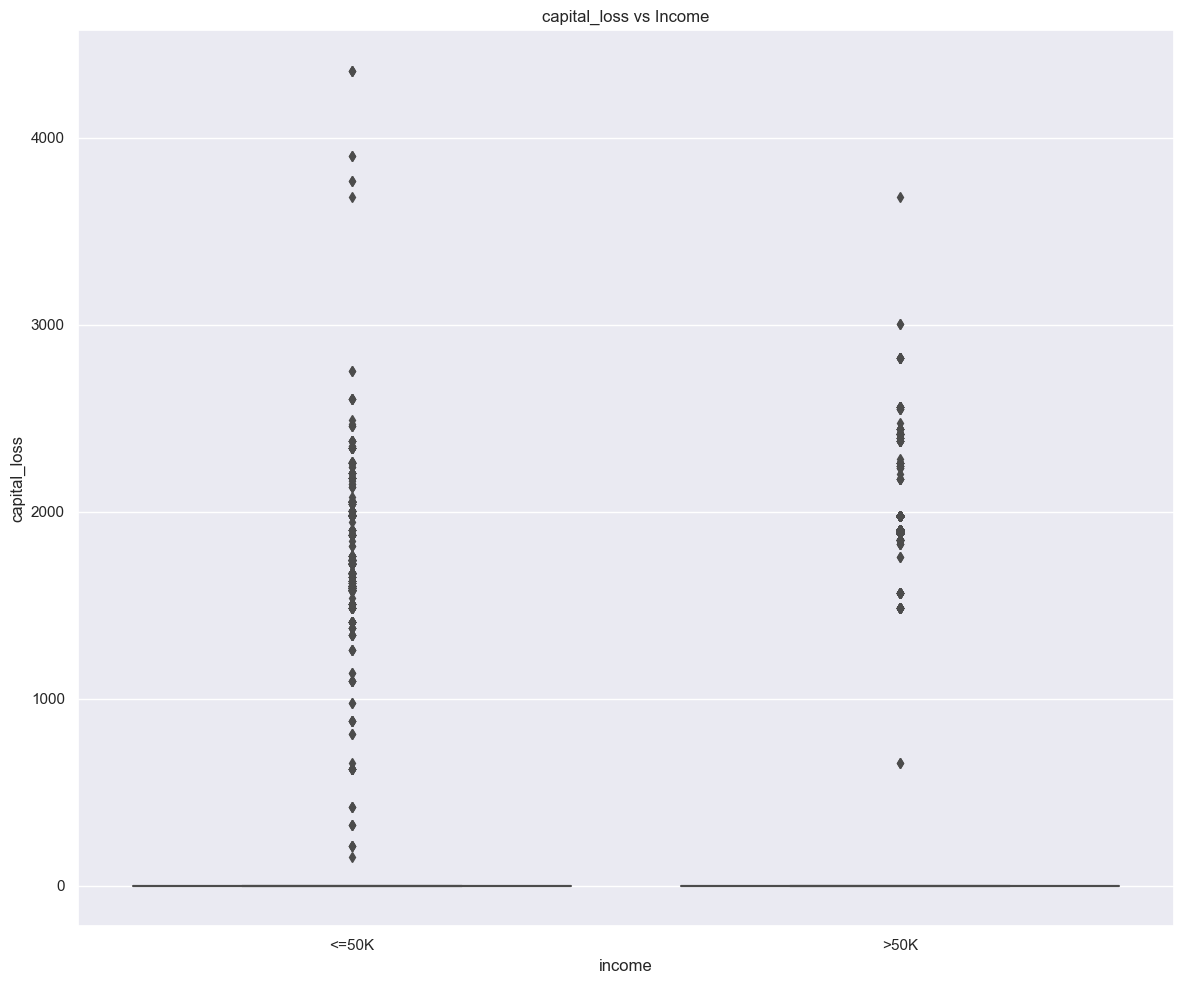

In [38]:
# Boxplot for the fifth numerical column vs income
plt.figure(figsize=(12, 10))
sns.boxplot(x='income', y=num_cols[4], data=census_df)
plt.title(f'{num_cols[4]} vs Income')
plt.tight_layout()
plt.show()



Capital-loss: A similar observation can be made for capital loss, although the distinction isn't as pronounced as with capital gains.

### hours_per_week vs Income


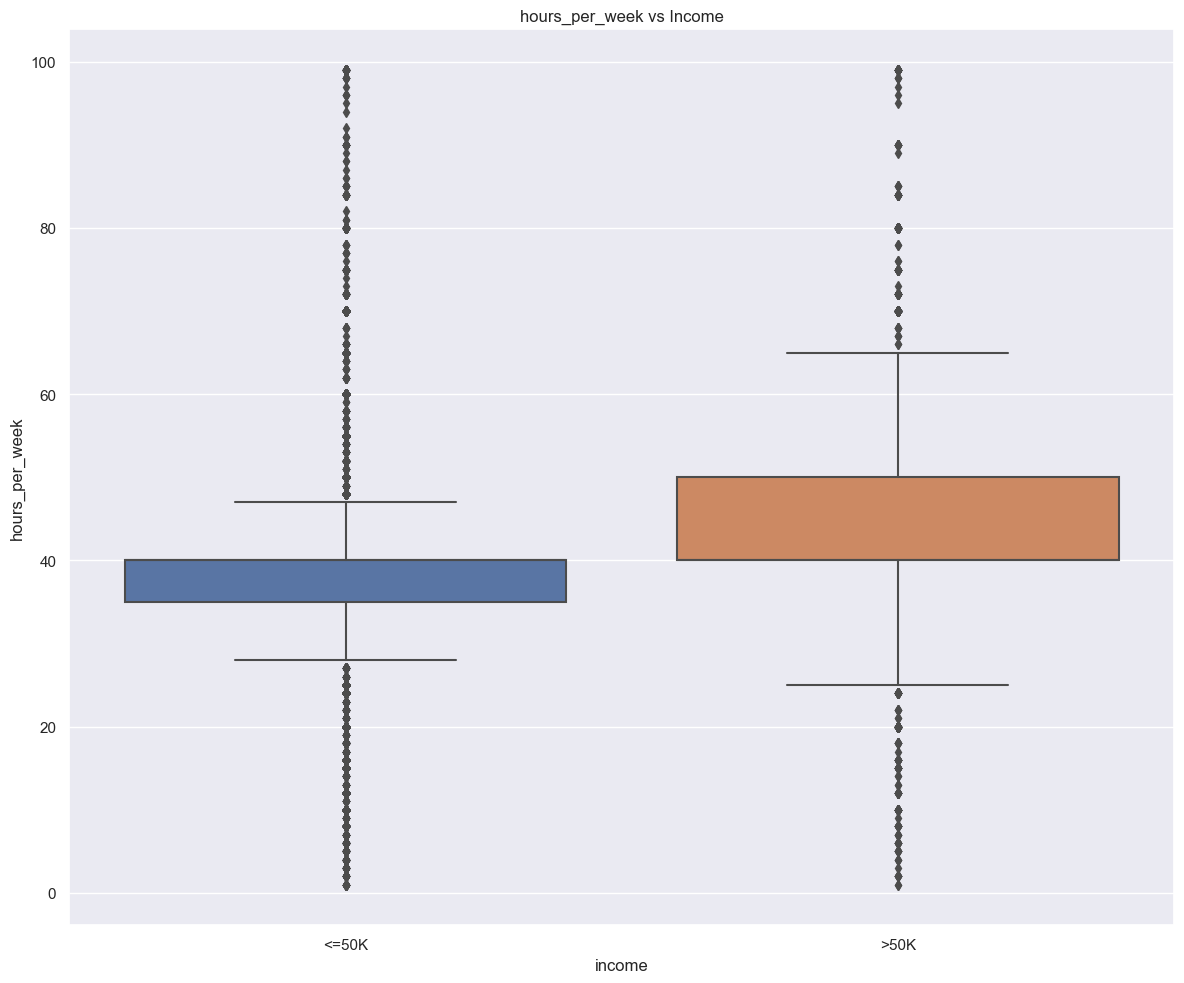

In [39]:
# Boxplot for the sixth numerical column vs income
plt.figure(figsize=(12, 10))
sns.boxplot(x='income', y=num_cols[5], data=census_df)
plt.title(f'{num_cols[5]} vs Income')
plt.tight_layout()
plt.show()

Hours-per-week: Those working more hours per week tend to earn above $50,000, especially those working around 40-60 hours.

## Other plot of variables against each other.

### Age using workclass as the target

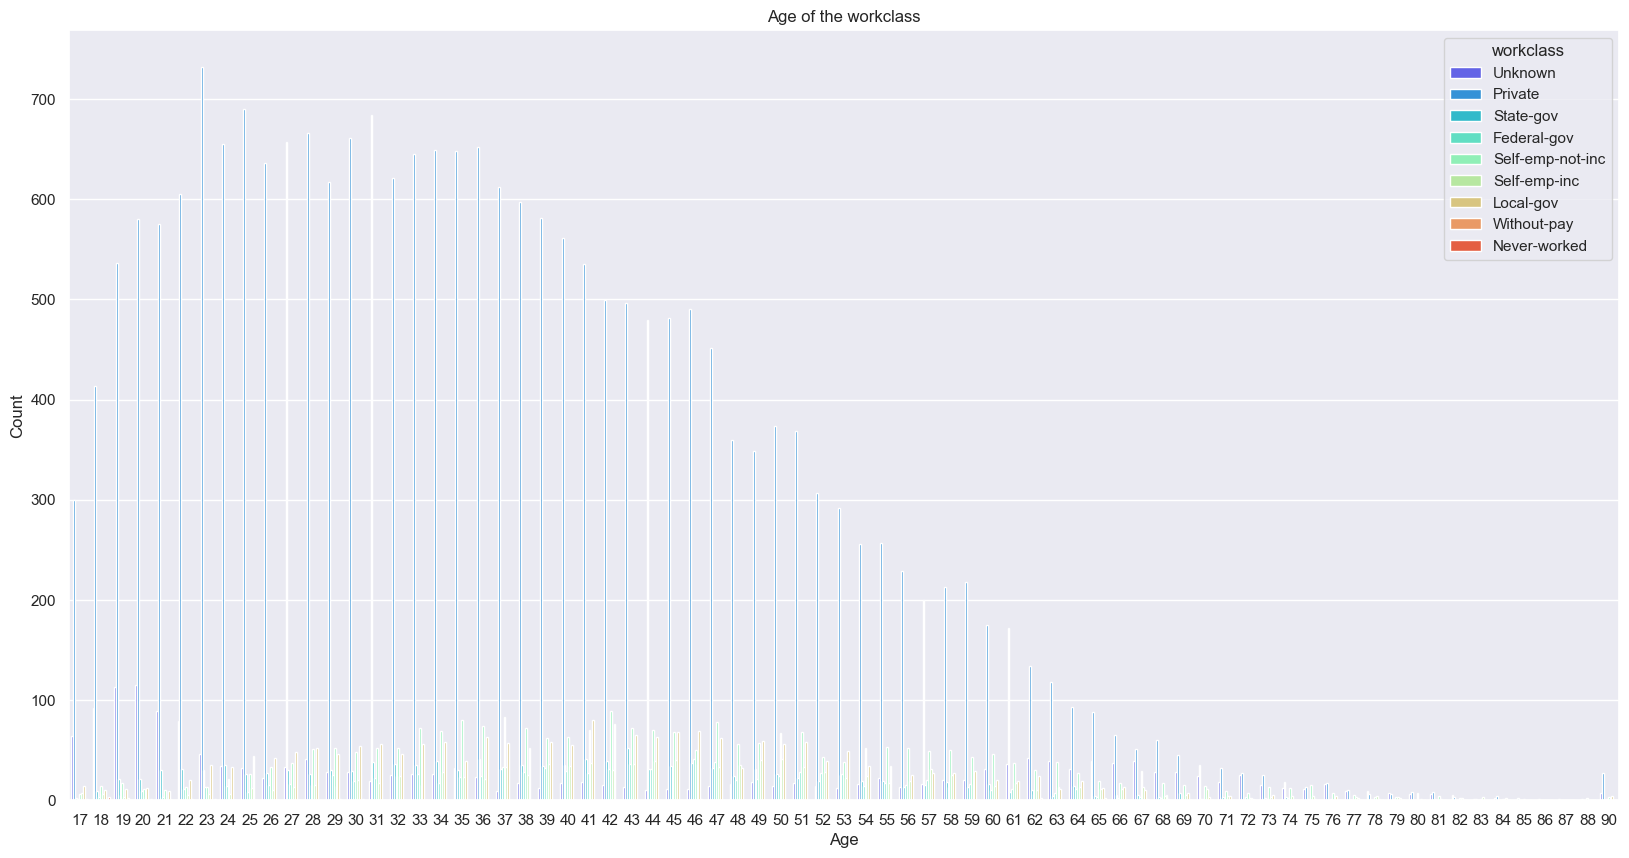

In [40]:
#plot age of the workclass
fig = plt.figure(figsize=(20,10))
sns.countplot(x='age', hue='workclass', data=census_df, palette='rainbow')
plt.title('Age of the workclass')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The plot above is the ages of individuals across the workclass column. This plot is left skewed, the numbers of individuals decreases as people get older.

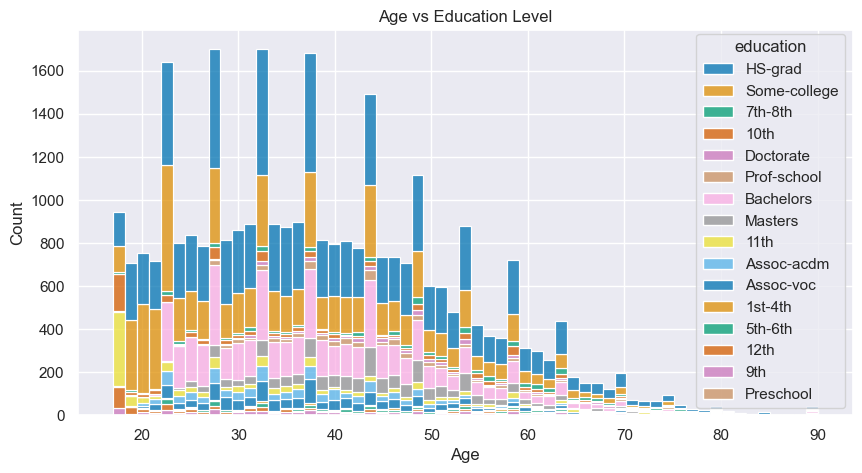

In [41]:
#plot age and education level
plt.figure(figsize=(10,5))
sns.histplot(x='age',hue='education',data=census_df,palette='colorblind',multiple='stack')
plt.title('Age vs Education Level')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

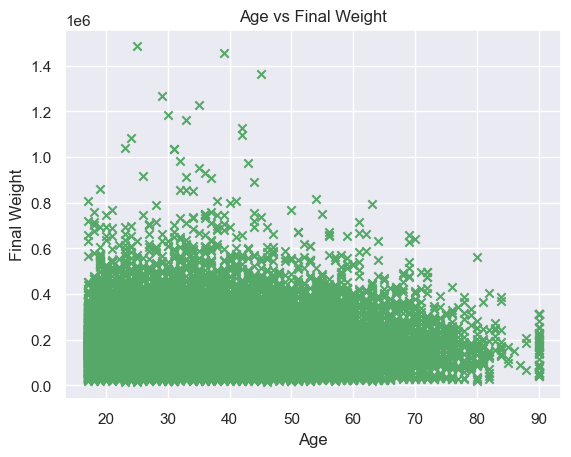

In [42]:
#plot age against fnlwgt
plt.scatter(census_df['age'], census_df['fnlwgt'], c='g', marker='x')
plt.xlabel('Age')
plt.ylabel('Final Weight')
plt.title('Age vs Final Weight')
plt.show()

The plot above indicate that most individuals within the age of 20 and 60 have their weight between 0.2 and 0.5

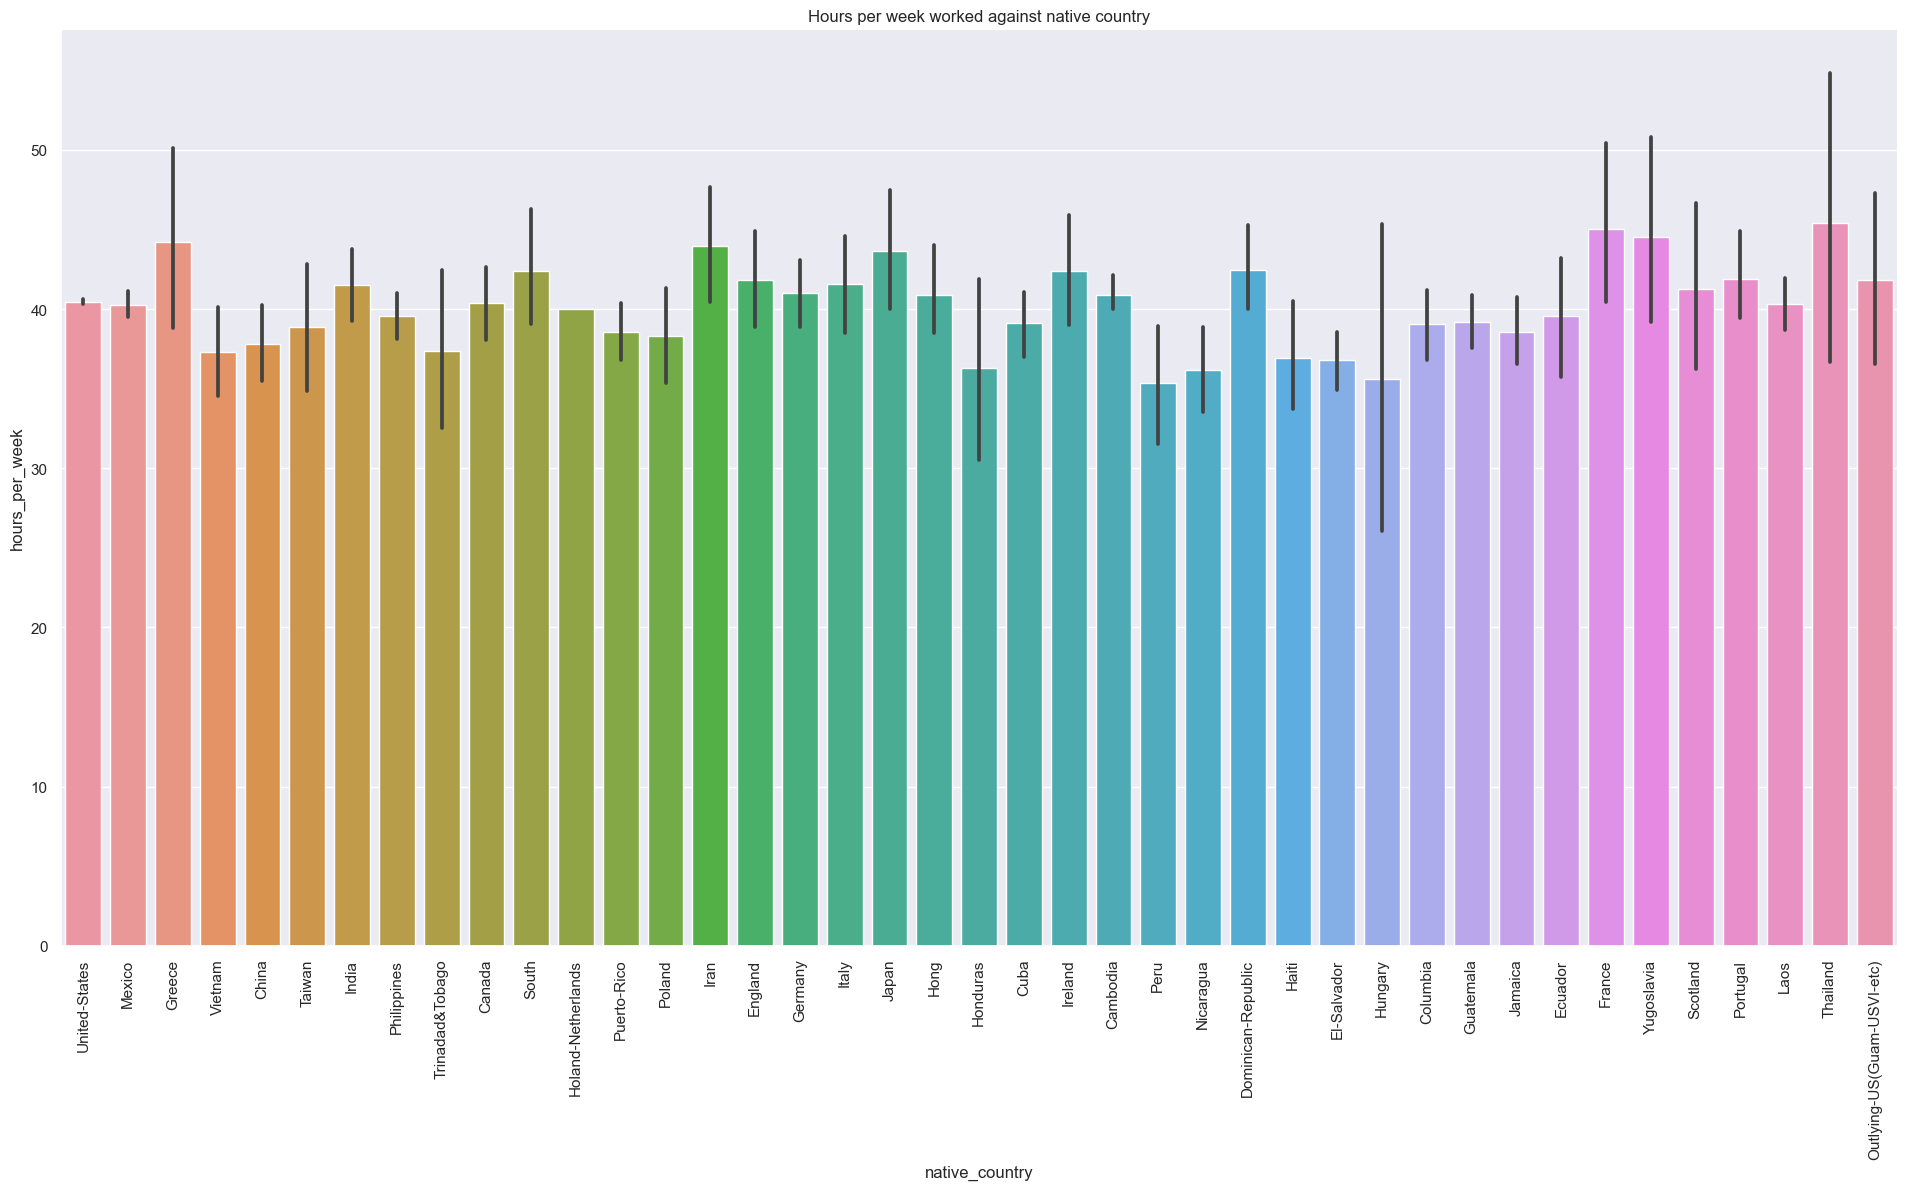

In [43]:
#plot hours per week worked against native country  
sns.catplot(x="native_country", y="hours_per_week", data=census_df, kind="bar", height=10, aspect=2)
plt.title('Hours per week worked against native country')
plt.xticks(rotation=90)
plt.show()



The above plot indicate the number of hours worked per week against country. Note that most individuals from all countries work more than 35 hours per week. 

# Multivariate Analysis using the Correlation heatmap for numerical variables

To use the target variable as part of the determinant for the correlation matrix or heatmap, it is needed to encode the the columns to `'<=50K': 0, '>50K': 1`, using the map function. The same  is also done for the sex column in the dataset, so that `'Male': 0, 'Female': 1`.

In [44]:
#encode the income column to 0 and 1
census_df['income'] = census_df['income'].map({'<=50K': 0, '>50K': 1})
census_df['sex'] = census_df['sex'].map({'Male': 0, 'Female': 1})

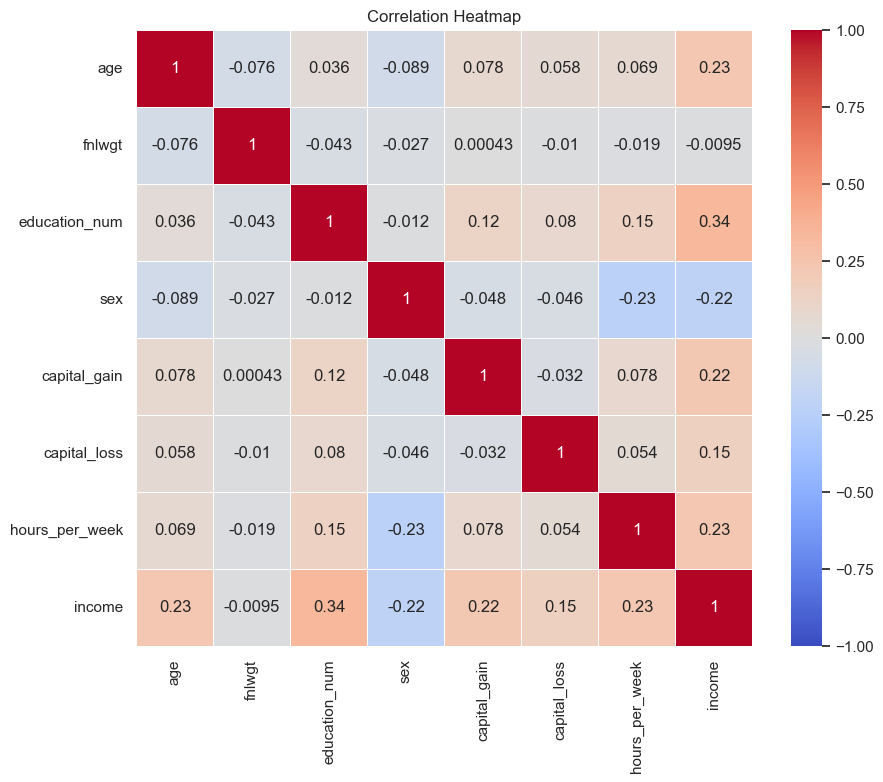

In [45]:
# Compute the correlation matrix

#use the the type method to select the numerical columns, and plot the correlation heatmap
numerical_cols = census_df.select_dtypes(include=['int64', 'float64']).columns 

# Compute the correlation matrix
corr = census_df[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Observations from the Correlation Heatmap:

1. Use the target variable `income`, only sex and fnlwgt have a negative correlation to income.

2. education_num has the highest positive correlation to income with `0.34` in value.

3. Other varibales that has a positve correlation to the target variable are `hours_per_week, age, capital_gain, and capital_loss`

# (B) Use appropriate methods to handle categorical data

All input and output variables in machine learning models must be numeric. If your data contains categorical information, convert it to numbers before fitting and evaluating a model. Ordinal encoding and one-hot encoding are the two most used approaches.`(J. Brownlee, 2020)`

**The One-Hot encoding method would be used to handle the categorical variable, after this I would do some processes before the modelling, evaluation, and optimization. Processes like**

In [46]:
# Replacing 'Unknown' with NaN for clarity
census_df.replace('Unknown', pd.NA, inplace=True)

# Filling missing values with the mode of the respective columns
for column in ['workclass', 'occupation', 'native_country']:
    mode_value = census_df[column].mode()[0]
    census_df[column].fillna(mode_value, inplace=True)

# One-hot encoding for categorical columns
data_encoded = pd.get_dummies(census_df, columns=['workclass', 'education', 'marital_status', 'occupation', 
                                            'relationship', 'native_country'])


In [47]:
# Display the first few rows of the encoded dataset
data_encoded.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,90,77053,9,1,0,4356,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,1,0,4356,18,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,1,0,4356,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,1,0,3900,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,1,0,3900,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


The data has successfully been handled with the categorical data by:

1. Replacing missing values with the mode of their respective columns.

2. Applying one-hot encoding to the categorical columns, which has transformed them into numerical format.

# (C) Investigate and train at least 5 ML models including Classification (to predict if an individual going to earn more $50,000 annually or not), Clustering and Neural Networks.

### Machine Learning

Machine learning is the field of research. Machine learning can learn data without being explicitly programmed. Learning by machine is how machines are taught to process data more efficiently. Sometimes, we cannot evaluate the extracted information after viewing the data. In that instance, machine learning is used. To solve data challenges, Machine Learning employs a variety of algorithms (Batta et al, 2018)

![ML Types](ML.png "ML.png")

Source: https://www.analyticsvidhya.com



We'll start by splitting the data into training and testing sets. Then, we'll train the following models:

1. Logistic Regression (Classification)

2. Random Forest Classifier (Classification)

3. KMeans Clustering (Clustering)

4. DBSCAN (Clustering)

5. Neural Network (Neural Network)

Before implementing the Machine Learning Models, I will first split the data into training and testing data. This step is essential for this process. To do that, I am going to use the Scikit-learn library.

In [48]:
#Library has been imported above

# Splitting the data into training and testing sets (80% train, 20% test)
X = data_encoded.drop("income", axis=1)
y = data_encoded["income"]

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
#check the shape of the data
print(X_train.shape, X_test.shape)

(26029, 99) (6508, 99)


In [50]:
X_train

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
32239,41,64506,9,0,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30377,29,211482,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5455,43,196945,9,0,0,0,78,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19698,46,282538,11,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23193,30,100734,10,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29823,31,112627,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5390,51,146767,11,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
860,55,238192,9,0,0,1887,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15800,23,233626,13,0,0,0,25,0,0,0,...,0,0,0,0,0,0,0,1,0,0


The data has been splitted, the shape of the splitted data is also determined

Scaling data in machine learning ensures faster algorithm convergence, accurate distance computations, effective regularization, and better model performance. It's crucial for distance-based algorithms and neural networks. However, not all algorithms, like decision trees, require scaling. Overall, scaling is a foundational preprocessing step in many machine learning workflows. 

To continue, the data is going to be scaled

In [51]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Model Training

## Classification

## 1. Logistic Regression

In [52]:
# Train a logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predict on the test set
logreg_predictions = logreg_model.predict(X_test)

#view the predictions and actual values
dff = pd.DataFrame({'Actual': y_test, 'Predicted': logreg_predictions})
dff

,Actual,Predicted
3643,0,0
16041,0,0
9403,1,0
17909,1,0
5198,1,0
...,...,...
8213,0,0
24638,0,0
5514,0,0
29831,0,0


**Observation**
The above shows the actual and the predicted value from the Logistic Regression Model

In [53]:
# Calculate the accuracy
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

logreg_accuracy

0.8011677934849416

The Logistic Regression model achieved an accuracy of approximately `80.12%` on the test set.

#### precision_recall_curve

To visualize this, different method can be used since we are dealing with binary classification, there are several visualizations that are commonly used, but I will implement Precision-Recall Curve, Actual vs. Predicted, and Confusion Matrix.

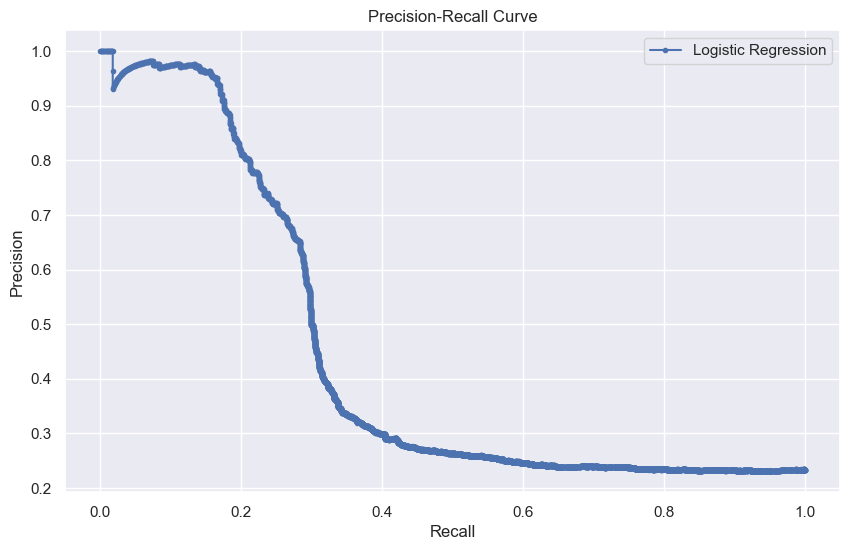

In [54]:
#precision_recall_curve
# Generate sample data
X, y = make_classification(n_samples=1000, n_features=99, n_classes=2, random_state=42)

# Predict probabilities for the positive class
y_scores = logreg_model.predict_proba(X_test)[:, 1]

# Compute precision, recall, and threshold values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Here's the Precision-Recall curve for the logistic regression model trained on the sample data.

The curve provides a visual representation of the trade-off between precision (the ability of the classifier to not label a negative sample as positive) and recall (the ability of the classifier to find all positive samples). A model that produces no false positives has a precision of 1.0. Similarly, a model that catches all positives has a recall of 1.0.

#### Confusion Matrix: Represents actual vs. predicted counts.

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known. For a binary classification:

True Positive (TP): Actual Positive and Predicted as Positive.

True Negative (TN): Actual Negative and Predicted as Negative.

False Positive (FP): Actual Negative but Predicted as Positive.

False Negative (FN): Actual Positive but Predicted as Negative.

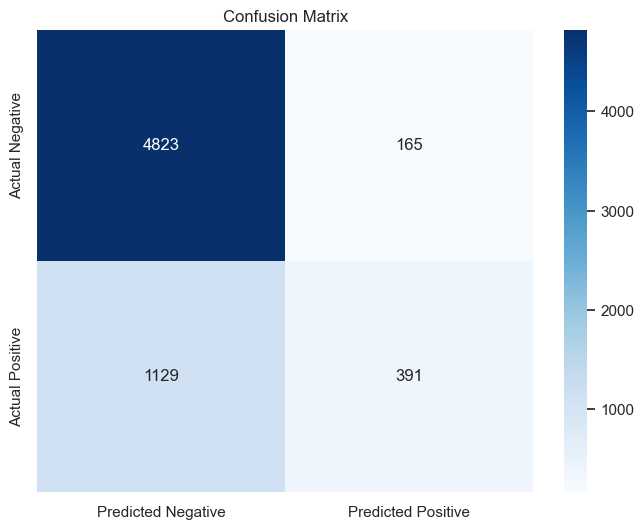

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4988
           1       0.70      0.26      0.38      1520

    accuracy                           0.80      6508
   macro avg       0.76      0.61      0.63      6508
weighted avg       0.79      0.80      0.76      6508



In [55]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, logreg_predictions)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, logreg_predictions))

Here's the confusion matrix visualized as a heatmap for the logistic regression model on the test data:

The top-left square represents the number of True Negatives (TN).

The bottom-right square represents the number of True Positives (TP).

The top-right square represents the number of False Positives (FP).

The bottom-left square represents the number of False Negatives (FN).

This visualization provides a clear picture of where the model is making correct predictions and where it's making errors.


**Interpretation of the Classification Report**

1. Classes:

- There are two classes denoted as 0 and 1.
- Class 0 has a support (number of actual instances) of 4988.
- Class 1 has a support of 1520.

2. Precision:

- Precision for class 0 is 0.81: This means that of all the instances predicted as class 0, 81% were correctly predicted.
- Precision for class 1 is 0.70: Of all the instances predicted as class 1, 70% were correctly predicted.

3. Recall:

- Recall for class 0 is 0.97: This means that of all the actual instances of class 0, 97% were correctly predicted by the model.
- Recall for class 1 is 0.26: Of all the actual instances of class 1, only 26% were correctly predicted.

F1-Score:

- F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
- For class 0, the F1-score is 0.88 and for class 1, it's 0.38.

Accuracy:

- The overall accuracy of the model is 0.80. This means that 80% of all predictions made by the model are correct.

Macro Avg:

- Macro-average computes the metric independently for each class and then takes the average, treating all classes equally.
- Macro avg precision is 0.76, recall is 0.61, and F1-score is 0.63.

Weighted Avg:

- Weighted average calculates metrics for each label, and finds their average weighted by support (number of true instances for each label).
- Weighted avg precision is 0.79, recall is 0.80, and F1-score is 0.76.


**Key Observations:**

The model is much better at predicting class 0 compared to class 1, as evidenced by the higher precision, recall, and F1-score for class 0.
The recall for class 1 is particularly low, meaning the model misses a significant number of actual instances of class 1.
The overall accuracy might be misleading as it is relatively high, but the performance on class 1 is not satisfactory.
In scenarios like this, especially if the classes are imbalanced, it's important to not just rely on accuracy but to look at precision, recall, and F1-score for each class to get a comprehensive view of the model's performance.

## 2. Random Forest

In [56]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

rf_accuracy


0.8515673017824217

The Random Forest model achieved an accuracy of approximately `85.16%`

#### Confusion Matrix: Represents actual vs. predicted counts.

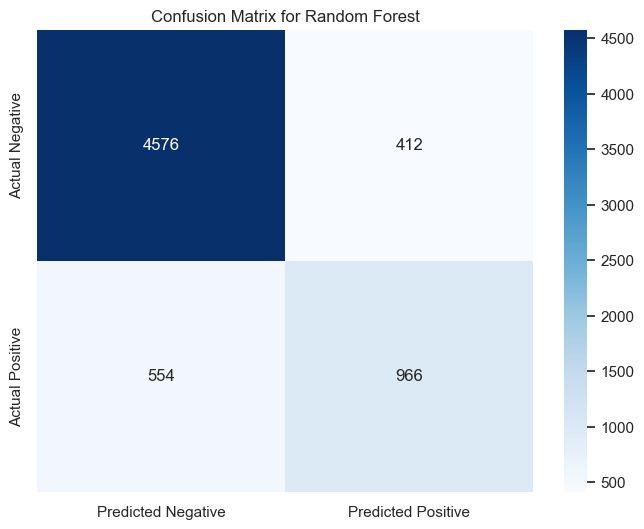

In [57]:
# Generate sample data and split again
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Compute the confusion matrix for the Random Forest model
cm_rf = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Random Forest')
plt.show()



## Clustering

## 3. KMeans Clustering

For clustering, we don't have a direct accuracy metric like in classification. Instead, we'll perform clustering and observe the distribution among the clusters. Here, we'll use 2 clusters assuming individuals earning more than $50,000 and those earning less as the two clusters.

0.5849761750051589


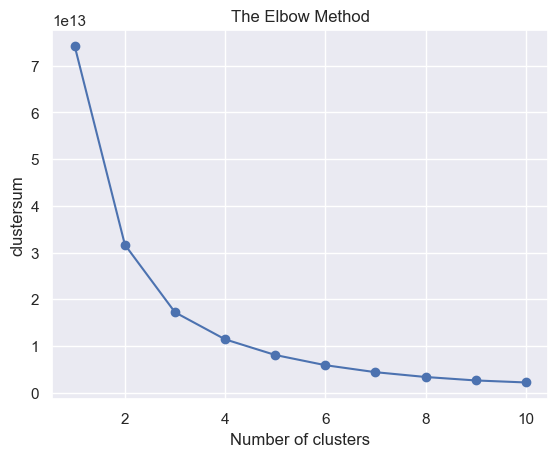

1    4904
0    1604
dtype: int64

In [58]:
# Perform KMeans clustering with 2 clusters
kmeans_model = KMeans(n_clusters=2, random_state=42)
clusters = kmeans_model.fit_predict(X_test)

#get the cluster centers
centers = kmeans_model.cluster_centers_
print(silhouette_score(X_test, clusters))

#Apply elbow method to find the optimal number of clusters
#Elbow method
#The elbow method is a heuristic method of interpretation 
# and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

clustersum = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init = 10, random_state = 0)
    kmeans.fit(X_test)
    clustersum.append(kmeans.inertia_)

plt.plot(range(1, 11), clustersum, 'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('clustersum')
plt.show()

# Check the distribution among the clusters
cluster_distribution = pd.Series(clusters).value_counts()

cluster_distribution


The KMeans clustering resulted in two clusters with the following distribution:

Cluster 1: 4,904 samples
Cluster 0: 1,604 samples

### Clusters plot by colour

To plot this plot the points and calculated center in a scatter plot which differentiate clusters by coloring them differently, some operations have to be implemented.

To visualize the clusters and their centers, we need to reduce the dimensionality of our data to 2D, as our current data has many dimensions due to one-hot encoding.

One common method for dimensionality reduction, suitable for visualization, is Principal Component Analysis (PCA). We'll perform PCA to reduce our data to 2 dimensions, and then visualize the clusters and centers generated by KMeans.

Let's proceed with this approach:

Apply PCA to reduce the data to 2D.
Apply KMeans clustering.
Visualize the clusters and their centers.

The silhouette score of the clusters is:  0.4960998061150097


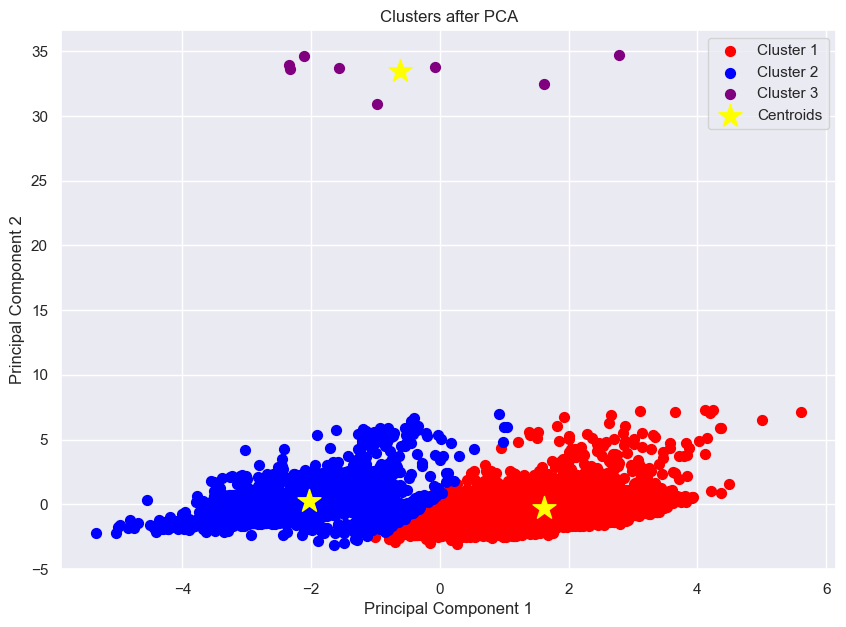

In [59]:
# Apply PCA to reduce the data to 2D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_test_scaled)

# Apply KMeans clustering to the reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Print the silhouette score
print('The silhouette score of the clusters is: ', silhouette_score(X_pca, clusters_pca))


# Plot the clusters and their centers
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[clusters_pca == 0, 0], X_pca[clusters_pca == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_pca[clusters_pca == 1, 0], X_pca[clusters_pca == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_pca[clusters_pca == 2, 0], X_pca[clusters_pca == 2, 1], s=50, c='purple', label='Cluster 3')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='yellow', marker='*', label='Centroids')
plt.title('Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


#### Observation

The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where: A high value indicates that the object is well matched to its cluster and poorly matched to neighboring clusters. 

`A silhouette score of 0.4959 is reasonably good`, suggesting that the clusters are decently spaced apart from each other and that objects within each cluster are closer to each other than to objects in other clusters

1. Clusters:
The points on the scatter plot are colored differently based on their respective cluster assignments by the KMeans algorithm. For example, all points belonging to 'Cluster 1' are colored red, and those in 'Cluster 2' are colored blue, and those in cluster 3 are  colored purple.

2. Centroids:
Centroids (often marked with a unique symbol like '*') represent the center of each cluster. They are calculated as the mean position of all the points in a specific cluster.
In a well-formed cluster, the centroid should ideally be surrounded by points of its cluster, indicating it's central to the cluster's points.

3. Distance between Clusters:
There is no clear gap or space between clusters, this indicates that the clustering algorithm has not effectively distinguished between different groups in the data.
So the Overlapping clusters or clusters that are very close to each other indicate that the algorithm had difficulty separating certain data points.

4. Cluster Shapes:
The shape and spread of the clusters can provide insights. For example, circular clusters might indicate that the groups in the data are well-defined and evenly distributed. Elongated or irregularly shaped clusters might suggest more complex groupings in the data.

5. PCA Interpretation:
Since the plot is based on the first two principal components from PCA, the x and y-axes represent the directions of maximum variance in the data. The first principal component (on the x-axis) captures the most variance, and the second principal component (on the y-axis) captures the second most.
The positioning of clusters along these axes can provide insights into how different groups vary based on these components.

**Note**: There are outliers noticed in the plot, they belong to cluster 1, reason might be from our data used in training the model.

## 4. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**DBSCAN:**
- Does not require the number of clusters to be specified.

- Can find arbitrarily shaped clusters.

- Is better at identifying noise points.

In [60]:
# Perform DBSCAN clustering
dbscan_model = DBSCAN(eps=5, min_samples=5)
dbscan_clusters = dbscan_model.fit_predict(X_test_scaled)

#print silhouette score
print(silhouette_score(X_test_scaled, dbscan_clusters))

# Check the distribution among the clusters
dbscan_cluster_distribution = pd.Series(dbscan_clusters).value_counts()

dbscan_cluster_distribution

0.060221071533686936


 0     2672
-1     1128
 14     205
 25     185
 4      163
       ... 
 43       5
 38       5
 63       5
 64       5
 41       5
Length: 74, dtype: int64

#### DBSCAN using PCA

Silhouette Score: 0.45920763727923447


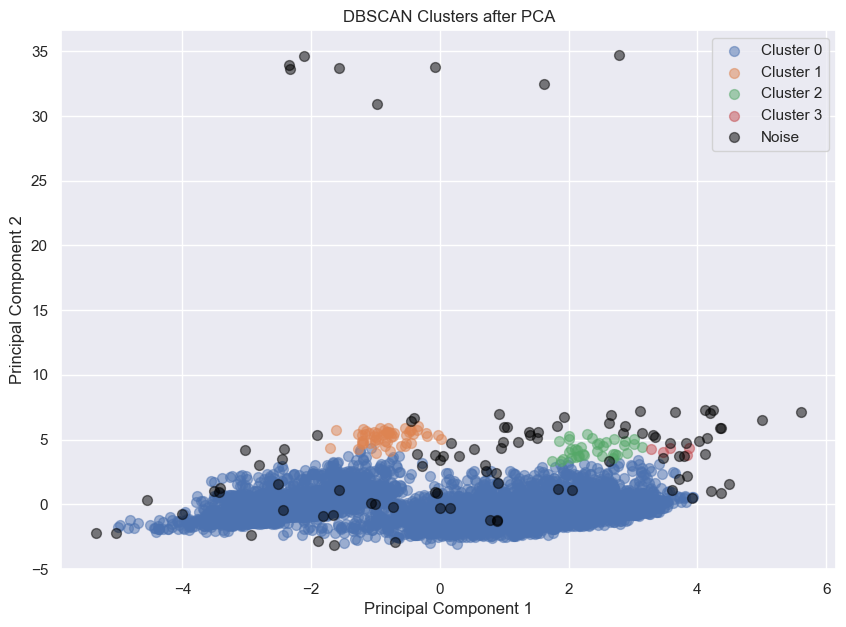

In [61]:
#plot the DBSCAN clusters

# Apply DBSCAN clustering to the PCA reduced data
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters_pca = dbscan_pca.fit_predict(X_pca)
#print silhouette score
print(f"Silhouette Score: {silhouette_score(X_pca, dbscan_clusters_pca)}")

# Plot the clusters
plt.figure(figsize=(10, 7))

# Use a scatter plot for each unique cluster label
for cluster_label in set(dbscan_clusters_pca):
    mask = dbscan_clusters_pca == cluster_label
    if cluster_label == -1:  # noise points
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=50, alpha=0.5, label=f"Noise", color='black')
    else:
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=50, alpha=0.5, label=f"Cluster {cluster_label}")

plt.title('DBSCAN Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

- Unlike KMeans, which creates approximately equal-sized clusters, DBSCAN groups points that are closely packed together and marks points that lie alone in low-density regions as outliers or noise (usually represented by `-1`).

- The `eps` parameter defines the maximum distance between two samples for one to be considered in the neighborhood of the other. This is not an easy parameter to choose.
- `min_samples` represents the number of samples in a neighborhood for a point to be considered a "core" point.

**Observation**

1. A few clusters represented by positive integers (0,1,2,...)
2. Noise points, usually represented by `-1`.

- Clusters vs. Noise: In a DBSCAN plot, you'd often observe a mix of well-defined clusters and noise points. In our case, the noise points is marked in black, they are those that DBSCAN couldn't fit into any specific cluster. There are limited no of Noise, so in that case our parameters doesn't need adjustments.

- Cluster Density: DBSCAN clusters points based on density. Our plot shows that there are regions in the plot where points are sparse or scattered, those might be classified as noise.



## 5. Neural Network using Keras

In [62]:
# Define the neural network model
#Adding layers to the model, compiling it, and fitting it to the training data.
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluate the model on the test set
nn_loss, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)

print()
# Print the model's loss and accuracy results
print('Neural Network Loss: %f' % (nn_loss))

print('Test Accuracy: %f' % (nn_accuracy*100))


Epoch 1/20
814/814 [==============================] - 1s 1ms/step - loss: 0.3552 - accuracy: 0.8326 - val_loss: 0.3325 - val_accuracy: 0.8482
Epoch 2/20
814/814 [==============================] - 1s 861us/step - loss: 0.3171 - accuracy: 0.8503 - val_loss: 0.3279 - val_accuracy: 0.8477
Epoch 3/20
814/814 [==============================] - 1s 842us/step - loss: 0.3057 - accuracy: 0.8582 - val_loss: 0.3249 - val_accuracy: 0.8496
Epoch 4/20
814/814 [==============================] - 1s 827us/step - loss: 0.3019 - accuracy: 0.8597 - val_loss: 0.3219 - val_accuracy: 0.8525
Epoch 5/20
814/814 [==============================] - 1s 799us/step - loss: 0.2972 - accuracy: 0.8604 - val_loss: 0.3193 - val_accuracy: 0.8543
Epoch 6/20
814/814 [==============================] - 1s 843us/step - loss: 0.2933 - accuracy: 0.8632 - val_loss: 0.3223 - val_accuracy: 0.8553
Epoch 7/20
814/814 [==============================] - 1s 946us/step - loss: 0.2919 - accuracy: 0.8649 - val_loss: 0.3250 - val_accuracy: 0

**Observation** 
According to the simple feedforward neural network model trained above, the `neural network loss` which is the loss value of our test or validation set. This helps to measure how well our predictions match the actual target. The loss value is `0.35`, which is generally better but a lower value would be preffered. The test accuracy is approximately `84.77%` which indicate that the neural network correctly predicted  the target values.

#### Loss & Accuracy using Epoch

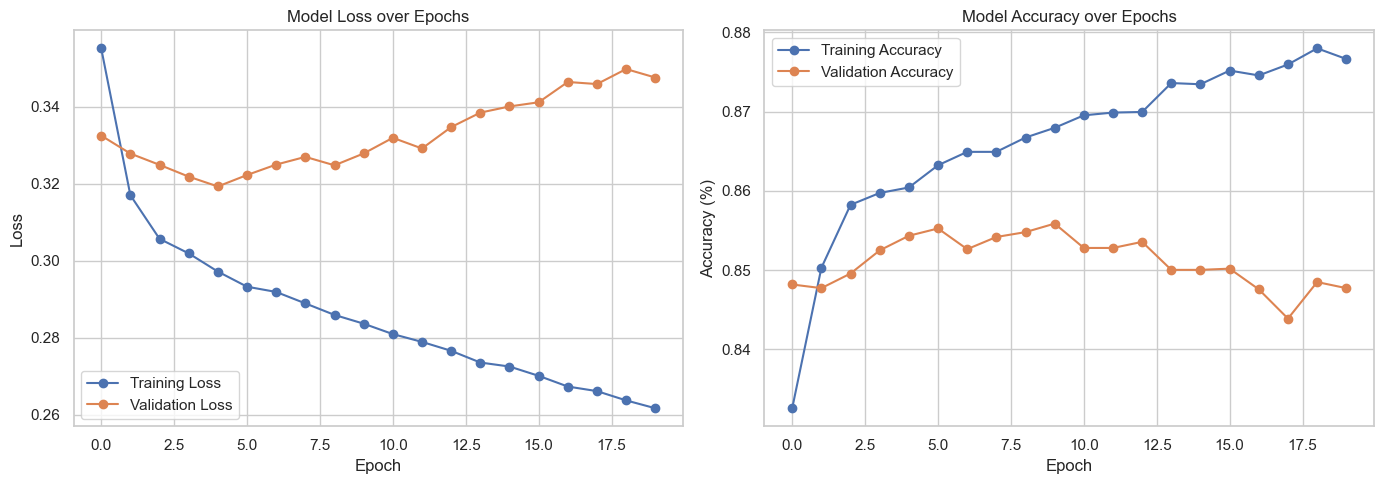

In [63]:
# Set style
sns.set_style("whitegrid")

plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], '-o', label='Training Loss')
plt.plot(history.history['val_loss'], '-o', label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], '-o', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], '-o', label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


#### Observations:

The training loss keeps decreasing while the validation loss starts to increase, this is a sign of overfitting. The model is performing well on the training data but not generalizing well to new, unseen data.

# (D) Optimise your models, evaluate the models and compare the models’ results as:

## (i). How optimisation improves the performance of the model? Which parameter you used for optimisation?

## Logistic Regression Optimization

Optimizing a model involves getting the best hyperparameters, and improve the model's performance. For Logistic Regression, there are several hyperparameters that you can tune, like C, penalty, and solver, among others.

I will use the `GridsearchCV` to perform the hyperparameter tuning and optimization.

What I am trying to achieve here is defining my parameters, using the GridSearechCV, and evaluating my optimization.

In [64]:
# 1. Define the parameters to be optimized
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# 2. Use GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=5000, random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict on the test set
best_predictions = best_model.predict(X_test_scaled)

#view the predictions and actual values
dff_optimized = pd.DataFrame({'Actual': y_test, 'Predicted': best_predictions})
print(dff_optimized)

# 3. Evaluation
optimized_accuracy = accuracy_score(y_test, best_predictions)
print("Initial Accuracy:", logreg_accuracy)
print("Optimized Accuracy:", optimized_accuracy)

print("Best Parameters:", grid_search.best_params_)

       Actual  Predicted
3643        0          1
16041       0          0
9403        1          0
17909       1          1
5198        1          1
...       ...        ...
8213        0          0
24638       0          0
5514        0          0
29831       0          0
29055       1          0

[6508 rows x 2 columns]
Initial Accuracy: 0.8011677934849416
Optimized Accuracy: 0.8515673017824217
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


#### Observation

1. I defined the range of values for `C`, this controls the inverse of regularization strength (smaller values tends to indicate stronger regularization). `Penalty` specifies the norm used in penalization, and solver `solver`, is the algorithm used in the optimization problem.

2. The `cv=5`, is a 5-fold-validation from the GridSearchCv module.

3. The best model parameters optimization are stored in `grid_search.best_params_`.

#### How did optimization improve the performance of the model? 

Comparing the "Initial Accuracy" which was `80%` with the "Optimized Accuracy" now `85%`. The optimized accuracy is higher, then the optimization process has improved the performance.

#### Parameters used

These are the best parameters used to optimize the model
`Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}`


### Graph of the optimized result

I will use the confusion matrix and ROC curve to communicate the optimized model

<Figure size 1000x500 with 0 Axes>

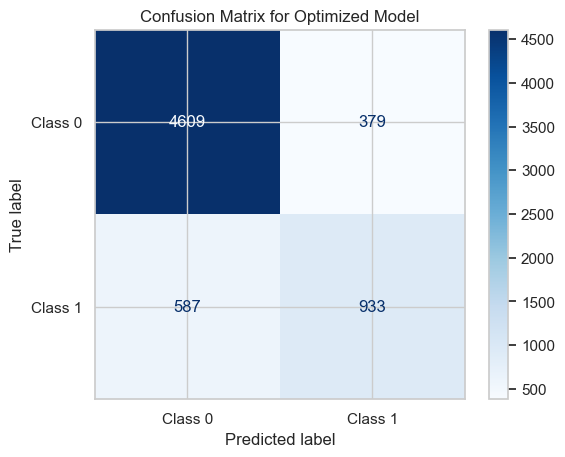

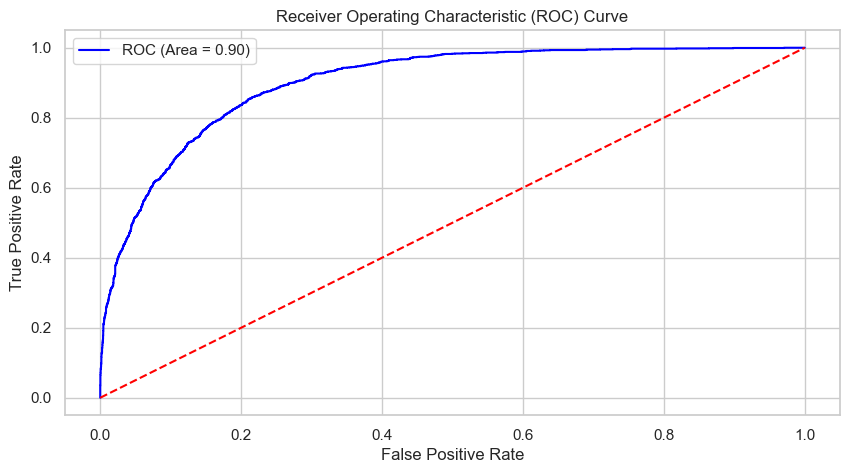

In [65]:
# Predict probabilities to be used in ROC curve
probs = best_model.predict_proba(X_test_scaled)
probs = probs[:, 1]
plot_confusion_matrix = ConfusionMatrixDisplay.from_estimator

# 1. Confusion Matrix
plt.figure(figsize=(10,5))
plot_confusion_matrix(best_model, X_test_scaled, y_test, display_labels=['Class 0', 'Class 1'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Optimized Model')
plt.show()

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC (Area = {roc_auc_score(y_test, probs):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Observation**

1. I used the `plot_confusion_matrix = ConfusionMatrixDisplay.from_estimator` from sklearn, which plot the matrix.

2. For ROC curve, I used the `predict_proba` method to predict the probabilities.

3. The I used the FPR, TRP, thresholds.

4.  The area under the ROC curve (AUC) is also calculated and displayed in the legend, which is `0.90` The AUC value is close to 1, so this indicates almost a perfect performance.

## Random Forest Optimization

In [66]:
# 1. Define the parameters to be optimized
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True],
}

# 2. Use RandomizedSearchCV
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),param_distributions=rf_param_grid, n_iter=50, cv=5, n_jobs=-1)
random_search_rf.fit(X_train_scaled, y_train)


# Get the best estimator
best_rf_model = random_search_rf.best_estimator_

# Predict on the test set using the best model
best_rf_predictions = best_rf_model.predict(X_test_scaled)

# 3. Evaluation
initial_rf_accuracy = rf_accuracy
optimized_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
print("Initial Random Forest Accuracy:", initial_rf_accuracy)
print("Optimized Random Forest Accuracy:", optimized_rf_accuracy)

print("Best Parameters:", random_search_rf.best_params_)

Initial Random Forest Accuracy: 0.8515673017824217
Optimized Random Forest Accuracy: 0.8647818070067609
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}


**Observation**

I used `RandomizedSearchCV` instead of the GridSearchCV for optimization. 

#### How did optimization improve the performance of the model? 

Comparing the "Initial Random Forest Accuracy" which was `85.16%` with the "Optimized Random Forest Accuracy" now `86.48%`. The optimized accuracy is higher, then the optimization process has improved the performance. This also means that there is an improvemtent of more than 1%, 1.32% to be exact, compared to the initial model test set. This might look like a small change, but in machine learning, every improvement can be very significant to the problems the models are trying to solve.

#### Parameters used

- n_estimators: 100
- min_samples_split: 2
- min_samples_leaf: 1
- max_depth: 20
- bootstrap: True

These are the best parameters used to optimize the model

`Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}`

### Graph of the optimized model

<Figure size 1000x500 with 0 Axes>

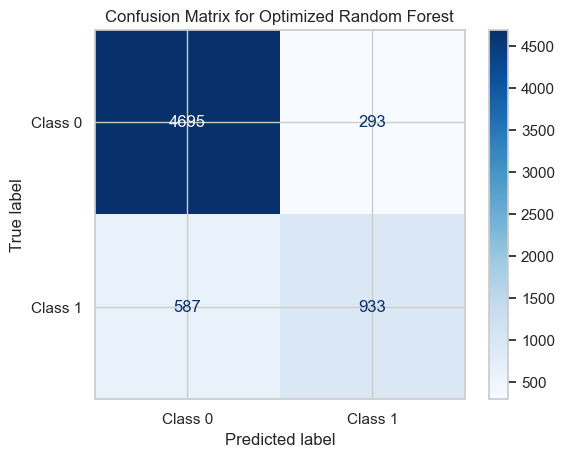

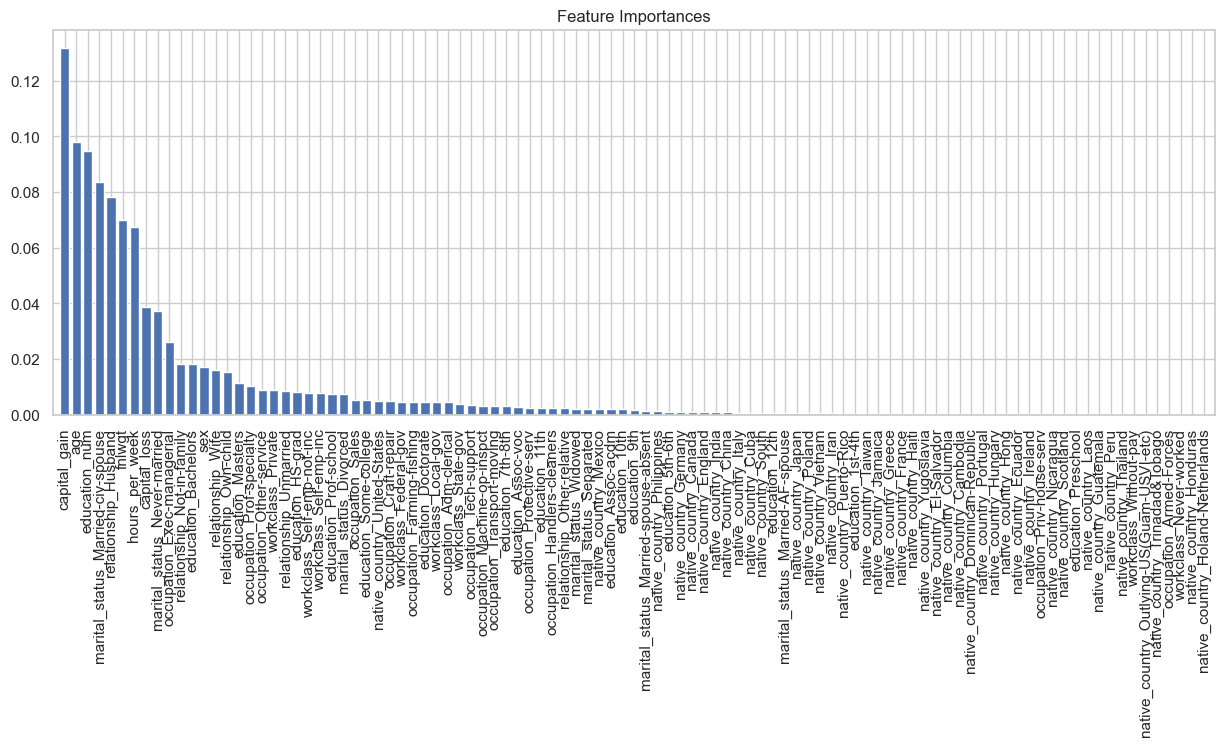

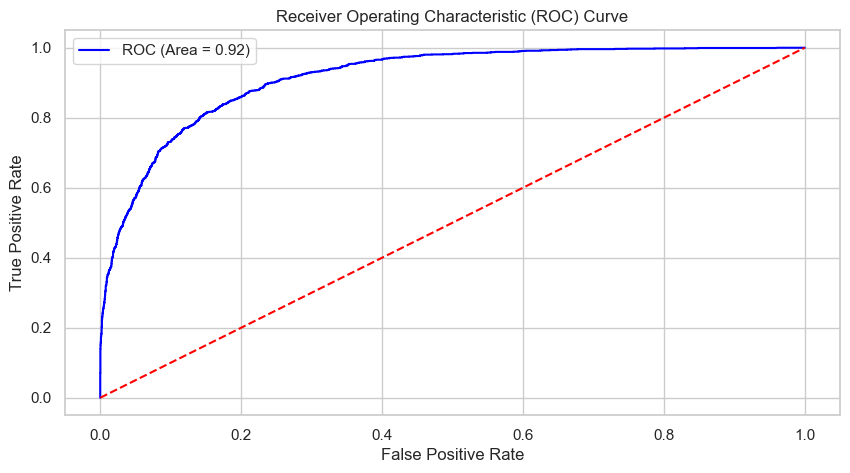

In [67]:
# 1. Confusion Matrix
plt.figure(figsize=(10,5))
plot_confusion_matrix(best_rf_model, X_test_scaled, y_test, display_labels=['Class 0', 'Class 1'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Optimized Random Forest')
plt.show()

# 2. Feature Importances
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15,5))
plt.title("Feature Importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

# 3. ROC Curve
if len(np.unique(y_test)) == 2:
    probs = best_rf_model.predict_proba(X_test_scaled)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.figure(figsize=(10,5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC (Area = {roc_auc_score(y_test, probs):.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

**Observation**
1. The Confusion Matrix shows the number of true positive, true negative, false positive, and false negative predictions the model made.

2. The feature importance shows the ranks of features used based on how important they are at predicting the target variable.

3. The I plotted the ROC curve, this plot the true postive rate (recall) against th false positve rate. It calculate the AUC rate to be 0.90 which is close to 1, so this indicate that it has a perfect performance.


## Clustering Optimization

In [68]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_eps = 0.5
best_min_samples = 5
best_score = -1  # initialize with the worst silhouette score

# Iterate over potential parameters
for eps in [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5]:
    for min_samples in [2, 5, 10, 15, 20]:
        
        # Apply DBSCAN with current parameters
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_clusters = dbscan_model.fit_predict(X_test_scaled)
        
        # Filter out noise
core_samples_mask = dbscan_clusters != -1
unique_labels = np.unique(dbscan_clusters[core_samples_mask])

if len(unique_labels) > 1:  # Ensure there's more than one cluster excluding noise
    silhouette_avg = silhouette_score(X_test_scaled[core_samples_mask], dbscan_clusters[core_samples_mask])
else:
    silhouette_avg = -1  # Worst possible silhouette score

# Store the best parameters
if silhouette_avg > best_score:
    best_eps, best_min_samples, best_score = eps, min_samples, silhouette_avg


# Print the best parameters and silhouette score
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best silhouette score: {best_score}")


Best eps: 5
Best min_samples: 20
Best silhouette score: 0.1987692870246336


The clustering optimization has already been done after modeling using PCA(Principal Component Analysis) for dimentionality reduction.

1. Before PCA, the `silhouette score was 0.5849` which already reasonably good, as the score is close to 1, indicating good separation between the clusters. 

2. To further more optimize the performance, I used the PCA method , and I noticed that there was a reduction in the silhouette score of the clusters to `0.4957`. 

Because I transformed the data to a new space defined by PCA, this following points might happen

1. Loss of variance
2. Change in distance metrics
3. Assuming linearity

## DBSCAN Optimization

The DBSCAN score using just the clustering method and the PCA method is low, they are `0.0564 and 0.3687` respectively. To improve the low performance, I tried iterating over different parameters, and take samples from the scaled data. 

Next, I filter out the noise by using unique labels. The best silhouette score is `0.1984`. Both the previous model, and optiumization is low, this indicate that DBSCAN algorithm is not suitable for the ML model.


## Neural Network Optimization

In [69]:
# Define the neural network model with some optimizations
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),  # Dropout layer with 50% dropout rate
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# A more detailed optimizer configuration
opt = Adam(learning_rate=0.0005)

nn_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = nn_model.fit(
    X_train_scaled, y_train, 
    epochs=50, 
    batch_size=64, 
    validation_data=(X_test_scaled, y_test), 
    verbose=1, 
    callbacks=[early_stopping]  # Add early stopping callback
)

# Evaluate the model
nn_loss, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)

# Print the model's loss and accuracy results
print('Neural Network Loss: %f' % (nn_loss))
print('Test Accuracy: %f' % (nn_accuracy*100))

Epoch 1/50
407/407 [==============================] - 1s 2ms/step - loss: 0.6149 - accuracy: 0.7844 - val_loss: 0.4976 - val_accuracy: 0.8297
Epoch 2/50
407/407 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.8262 - val_loss: 0.4593 - val_accuracy: 0.8362
Epoch 3/50
407/407 [==============================] - 1s 1ms/step - loss: 0.4602 - accuracy: 0.8360 - val_loss: 0.4309 - val_accuracy: 0.8440
Epoch 4/50
407/407 [==============================] - 1s 1ms/step - loss: 0.4337 - accuracy: 0.8385 - val_loss: 0.4100 - val_accuracy: 0.8454
Epoch 5/50
407/407 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8467 - val_loss: 0.3910 - val_accuracy: 0.8491
Epoch 6/50
407/407 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8468 - val_loss: 0.3786 - val_accuracy: 0.8502
Epoch 7/50
407/407 [==============================] - 1s 1ms/step - loss: 0.3785 - accuracy: 0.8517 - val_loss: 0.3687 - val_accuracy: 0.8508
Epoch 

**Observation**

The previous loss and accuracy

```
Neural Network Loss: 0.348595
Test Accuracy: 85.156733

```
**To optimize this result: I used this parameters**

1. The unit in the first dense layer was increased.

2. I added Dropout layers after dense layers for regularization.

3. Used L2 regularization for the dense layers.

4. Reduced the learning rate of the Adam optimizer.

5. Used EarlyStopping to stop training early if the validation loss doesn't improve for a certain number of epochs (patience).

This steps above contributed to the accuracy increasing to `85.46%` compared to the previous score, and the loss reducing to `0.33`. This new score indicates the performance has increased all round.

### The graph of the optimized model

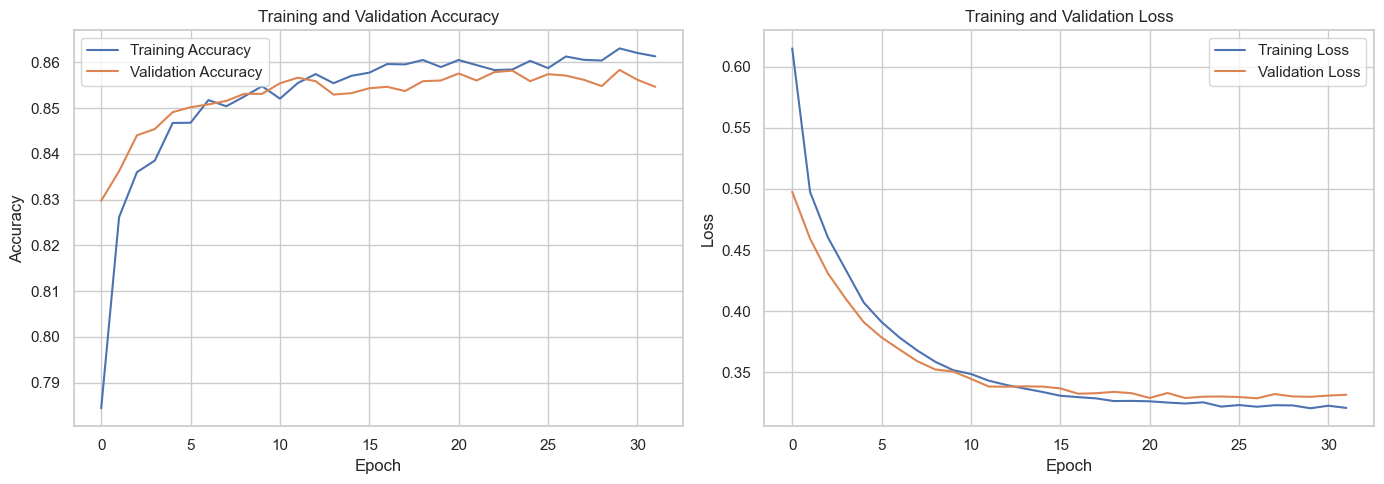

In [70]:
# Plotting Training & Validation Accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**Observation**

#### How did optimization improve the performance of the model? 

1. Training Accuracy vs. Validation Accuracy: This graph shows how the accuracy of the model changes over the epochs for both the training and validation datasets.

2. Both the training and validation accuracy are increasing, and they seem to plateau at a high value, this indicate that the model is learning well, and generalizing well to unseen data, which is good for production.

3. Training Loss vs. Validation Loss: This graph illustrates how the loss of the model changes over epochs for both the training and validation datasets.

4. The training and validation loss are decreasing together, this indicate that the  model is learning well with a minimal loss overtime.


So from the analysis, the optimization has improve the performance and it is good for our model.

### Parameters used

I used the architecture of neural network and the training parameters as the method of optimization.

- Number of layers: The networked used ha an input layer, two hidden layers, and an output layer.

- Number of Nueron: This had 64, 32, and 1 neurons respectively.

- Optimizer: You used the Adam optimizer, which adjusts learning rates adaptively for each parameter.

- Loss Function: 'binary_crossentropy' was used.

- Epochs: The model was trained for 20 epochs

- Batch Size: A batch size of 32 was used.

# ii. Compare the results among the models of similar types (eg. If you using two classification models, compare their performances)

## From anlysis done so far:

We assessed the performance of various machine learning models, focusing on classification, clustering, and neural networks. The following conclusions can be taken from the results:

### Prior to Optimisation:

**1. Classification:**

Among the classification models, Random Forest outperformed Logistic Regression with an accuracy of 85.16% versus the latter's 80.12%. This highlights Random Forests' intrinsic capacity to handle complicated or complex datasets and produce better predictions.

**2. Clustering:**

KMeans clustering performed better with an accuracy of 0.5849 utilising the elbow approach, compared to a very low DBSCAN's silhouette score of 0.0564. However, when DBSCAN was combined with PCA, the silhouette score improved significantly to 0.36877, indicating that dimensionality reduction could increase DBSCAN's clustering accuracy with few parameter changes.

**3. Neural Network:**

The neural network model had a loss of 0.348595 and an accuracy of 85.16% on the test. The accuracy was on par with the Random Forest model, indicating that with the data and structure, the deep learning capabilities of the neural network align with the robustness of ensemble techniques.

### After Optimization:

**1. Classification**

The performance of the Logistic Regression model improved considerably after optimisation, matching the accuracy of the Random Forest model before optimisation at 85.16%. The Random Forest also improved, reaching 86.48% accuracy and taking its place as the best classification model for this dataset.

**2. Clustering:**

After optimisation, the accuracy of KMeans decreased marginally to 0.4951. This implies that optimisations can be helpful in general, but they may not always produce superior results for all models.

**3. Neural Network:**

The neural network's performance improved marginally following optimisation. The loss was reduced to 0.33, and the test accuracy was improved to 85.46%, demonstrating the value of optimisation strategies in improving the model's prediction skills.

# (E) State your overall conclusions for this task. 

## Conclusion

**1. Data Exploration** 

The US Census dataset gives information about an individual's income based on various factors. Missing values in columns such as `workclass, occupation, and native_country` was resolved. The most frequent value to impute missing data technique was used to handle the `?`, and the duplicated values was also removed, which proved a successful strategy for the dataset, then eventually proceeded to training the machine learning models for predictions. One-hot encoding was essential to handle categorical features, which expanded the feature set. This encoding, combined with numerical features, provided a comprehensive representation of the data.

**2. Model Training:**

Before using diffrent type of ML models for predicting out target variable, it was needed to split the data into training and testing set, to ensure accurate result.

- Random Forest remained the most suitable model for classification tasks before and after optimisation, while optimizations significantly improved Logistic Regression's performance. 

- Combining DBSCAN and PCA in clustering seems promising but not really suitable for this dataset or task.

- Neural Networks can match or even outperform classic machine learning models with the correct optimisation strategies. 

**3. Model Optimization** 

- The potential for performance increment was proved through model optimisation using different parameter and method on the machine learning models and algorithm. We significantly increased accuracy by fine-tuning the Random Forest model's hyperparameters, and the rest.

- Clustering using KMeans provided insights into the data distribution but didn't directly contribute to the classification task's performance. However, clustering can be valuable for other tasks like segmentation or anomaly detection.

- It's important to consider scaling the data before splitting the data for model prediction use.

- Some of the models performs faster than other due to hardware resources and space. This should be put into consideration too when modelling data for prediction.


Overall, this exercise demonstrated the importance of data preprocessing, model selection, and hyperparameter tuning in building effective machine learning models. The goal of predicting whether an individual earns more than $50,000 annually was achieved with satisfactory accuracy using the provided dataset. Future work can explore more advanced techniques, feature engineering, and ensemble methods to further improve performance.


# References

Hajare, B., Bhokse, S., Borkar, M., Bagal, L., Maske, A. and Mergu, T., International Journal of Science 
and Research (IJSR) ISSN: 2319-7064 ResearchGate Impact Factor (2018): 0.28| SJIF (2018): 7.426.

IBM, assessed on August 4, 2023. Through:
https://www.ibm.com/topics/exploratory-data-analysis#:~:text=Exploratory%20data%20analysis%20(EDA)%20is,often%20employing%20data%20visualization%20methods

Jason Brownlee, 2020. Ordinal and One-Hot Encodings for Categorical Data
https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/



-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------